<center><h2>Explainable Machine Learning 2023/2024Z</h2></center>
<center><h3>Homework 3</h3></center>

Mateusz Szymański

## Introduction

This homework focuses on LIME: _Local Interpretable Model-agnostic Explanations_. The goal of the task is to apply this XAI method to models trained in the previous Homeworks, and then compare the results with SHAP: _SHapley Additive exPlanations_.

Let us recall that we have selected four vanilla models:
* a logistic regression (from `sklearn`)
* a random forest classifier (from `sklearn`)
* `XGBClassifier` from `xgboost`
* `TabPFN` from `tabpfn`

The dataset `phoneme.csv` is consisting of 5 unnamed columns describing amplitudes of certain harmonics. The target variable is a binary variable classification of vowels: `nasal` or `oral`.

## Sample selection

We are going to examine models behavior for selected observations. Of course, we can select some observations at random and we intend to do so. We've collected 250 random samples out of all

Besides, we are going to do a little better than that: by finding observations that:
* are not well predicted by given models
* behave differently categorized for different models

The first condition tells that the following error:

$$\sum_{m\in M}\left|m(x)-y\right|^2$$

is the highest, where $M$ is the set of all models, and $m(x)$ is the true class probability assigned by the model to the observation $x$, while $y$ is the true value. The higher value, the more models misclassify an observation.

The second condition describes the variance among predictions:

$$\sum_{m\in M}\left|m(x)-\overline{m}(x)\right|^2$$

where $\overline{m}(x)$ is the average of probabilities assigned by the models.

By this method we gather 15 sample observations by taking:
* 5 random observations
* 5 observations with the highest error
* 5 observations with the highest variance among models predictions

One third of chosen observations belongs to the first second category which is close to the imbalance coefficient of the entire dataset (about $30\%$).

## LIME values
| V1     |
As LIME explanations are random in nature and explanations for the same observation differ significantly, we decided to average results by settings 1000 samples for each observation (`num_samples=1000`). 

As a benchmark, to somehow quantify aforementioned differences, we calculated the average standard deviation of explanation values given by LIME for a logistic regression and randomly chosen 250 elements of our dataset. 

| column | standard deviation |
|--------|--------------------|
| V1     |    0.010810        |
| V2     |    0.011232        |
| V3     |    0.011175        |
| V4     |    0.010665        |
| V5     |    0.011582        |

The standard deviation of around $0.01$ for each column is not negligible but tolerable.

Let us proceed to the results.

### Logistic regression

As the trained logistic regression model is defined by the model coefficients (and the bias), we expect that values given by LIME should stay in some relation to coefficients to the model.

Let us compare logistic regression coefficients with values given by LIME. To estimate the relationship we took a sample of 250 element since our initial 15 elements are certainly biased.

| column   |   logistic regression coefficient |   LIME mean |
|:---------|----------------------------------:|------------:|
| V1       |                           -0.6998 |      0.1100 |
| V2       |                           -0.4370 |      0.0815 |
| V3       |                            0.4746 |      0.0900 |
| V4       |                            0.6726 |      0.1269 |
| V5       |                            0.1958 |      0.0361 |

Even with a small sample we see that there is some relationship between the absolute value of the logistic regression coefficients and values given by LIME, especially for `V4` and `V5`. The last columns seems to be in general the weakest one, while the penultimate one is often the strongest one.

The correlation coefficient for the absolute value of the coefficients and LIME is very high: $97\%$.

#### Example

LIME values differ among randomly chosen samples but they are similar for columns in the same range. This is clearly evident on the following example:

| 3174 | 3507 |
|:---:|:---:|
| 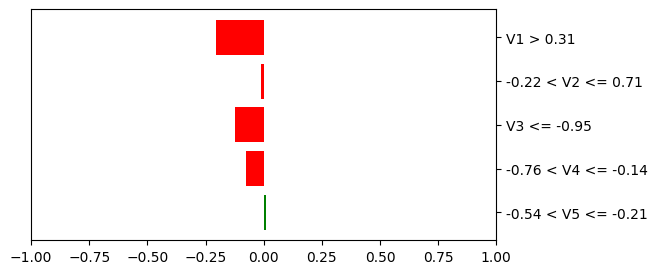</img> | 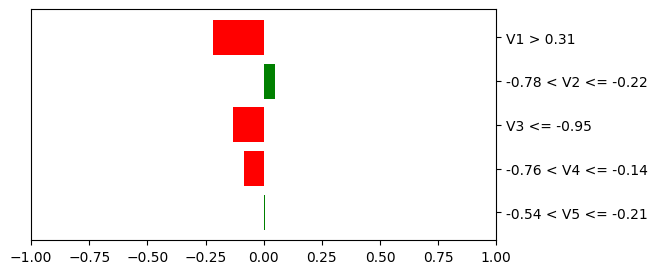</img> |

Two observations share similar LIME values except for the second column.

### Random forest

We have used LIME to explain the linear regression model. We did the same for the random forest model. We can compare average LIME values with random forest feature importance values (which sum up to $1$). This comparison may not be fully justified as feature importance describes slightly different thing.

| column   |   feature importance |   LIME mean |
|:---------|---------------------:|------------:|
| V1       |               0.1992 |      0.0745 |
| V2       |               0.1622 |      0.0788 |
| V3       |               0.2087 |      0.0793 |
| V4       |               0.3013 |      0.1166 |
| V5       |               0.1286 |      0.0563 |

Nevertheless, the correlation coefficient between LIME values and feature importances is high, around $95\%$.

LIME values are still close to each other for the same ranges of values, for each column. Let us take the same observation as in the previous example:

| 3174 | 3507 |
|:---:|:---:|
| 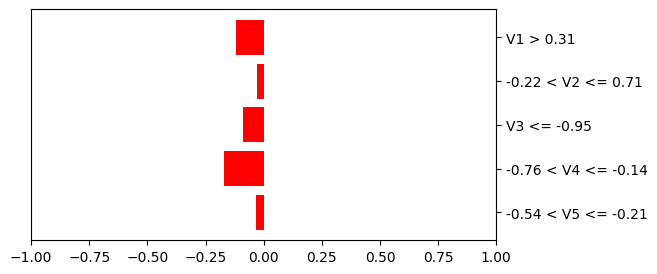</src> | 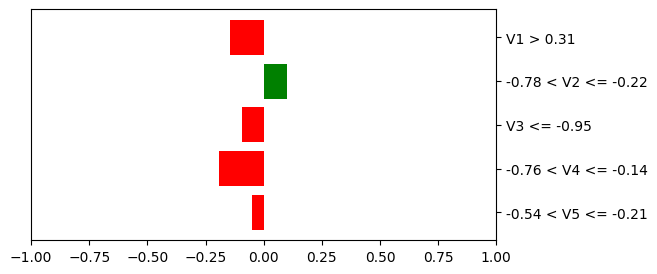</src> |

Again, except for the second column, the values are more or less the same.

### XGBoost



| column   |   feature importance |   LIME mean |
|:---------|---------------------:|------------:|
| V1       |               0.1662 |      0.1476 |
| V2       |               0.1427 |      0.0990 |
| V3       |               0.1517 |      0.0627 |
| V4       |               0.4055 |      0.1503 |
| V5       |               0.1340 |      0.0491 |

This time the correlation is still high but much less in comparison with previous models, namely $64.5\%$. We see that XGBoost measures `V4` column as much more important than other ones, of similar magnitude.

Some discrepancies for the same ranges have been observed, but in general LIME values are stable.

### Example

| 416 | 3022 |
|:---:|:---:|
| 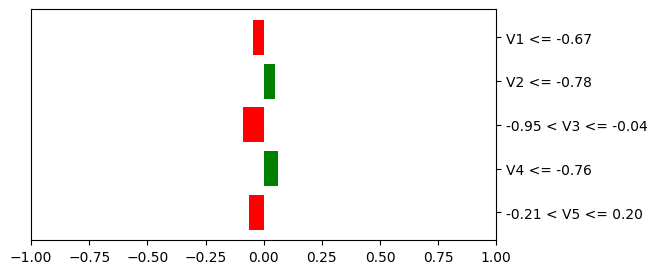</src> | 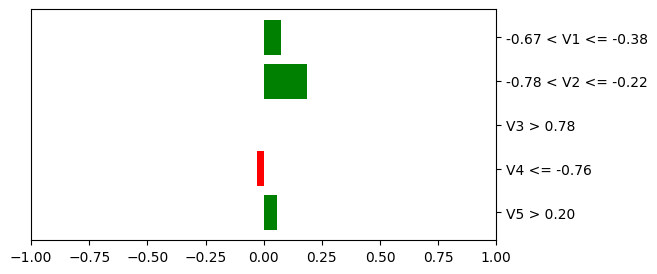</src> |


There is a visible difference for `V4` column in this example.

## TabPFN

Due to very slow _TabPFN_ inference time, the number of samples (`num_samples`) has been dramatically reduced to 5. 

We can see that, in contrary to previous models, `TabPFN` no longer has similar LIME values for the same column ranges. This can be easily seen on this example:

| 3507 | 3174 |
|:---:|:---:|
| 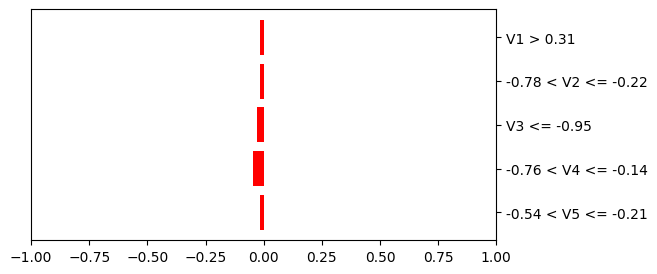</img> | 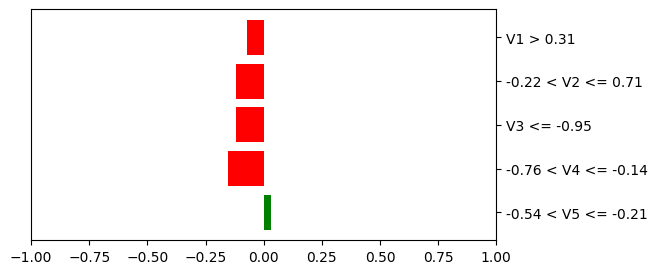</img> |

Despite the fact, that almost all values lie in the same range (except for `V2`), the LIME values differ, especially for `V4`.

However, this effect may be a result of a reduced number of samples per each observation.

## SHAP values

_SHapley Additive exPlanations_ (SHAPE) are based on Shapley values from game theory. The role of SHAP values is to determine marginal contribution of each agent. In this setting, this translates to contribution of a column to the predicted value by a classifier.

**Note**: _TabPFN_ has been disabled due to very slow inference time.

### Overview

All models except _TabPFN_ have been analyzed using `shap` package. 

| model | shap |
|:-----:|:----:|
|`LogisticRegression`|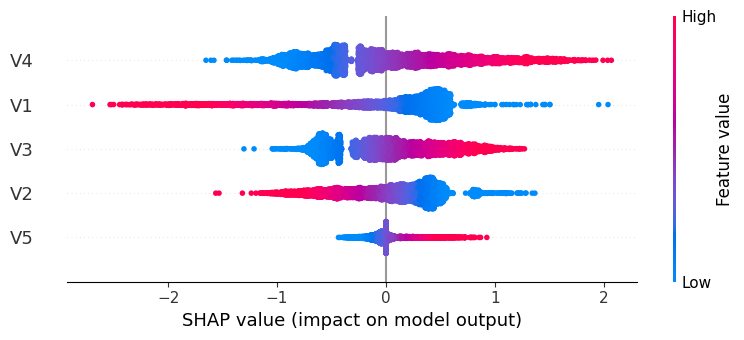</img>|
|`RandomForestClassifier`|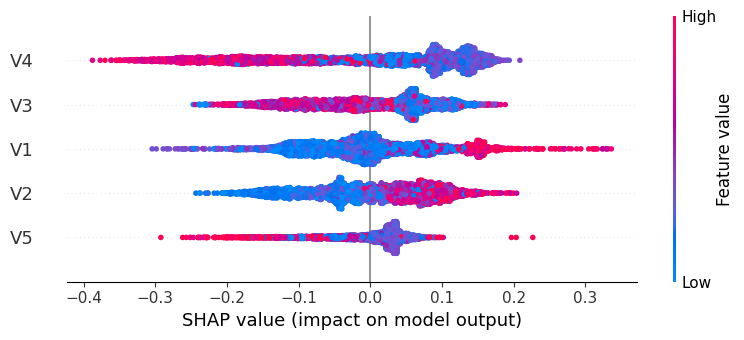</img>|
|`XGBClassifier`|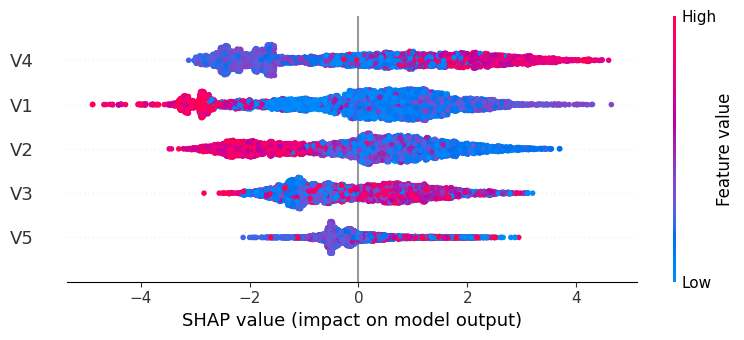</img>|

Both `LogisticRegression` and `RandomForestClassifier` share the same order of columns. In each case `V4` is the most important one while `V5` is the least important.

### Logistic regression

For logistic regression, both SHAP and LIME values often agree to some extent. Let us see some examples (**caution**: SHAP columns are sorted):

| id | LIME | SHAP |
|:--:|:----:|:----:|
| 1299 | 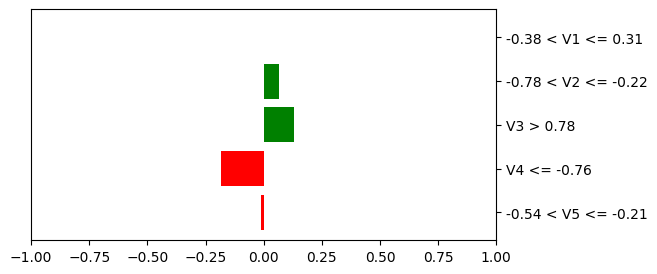</img> | 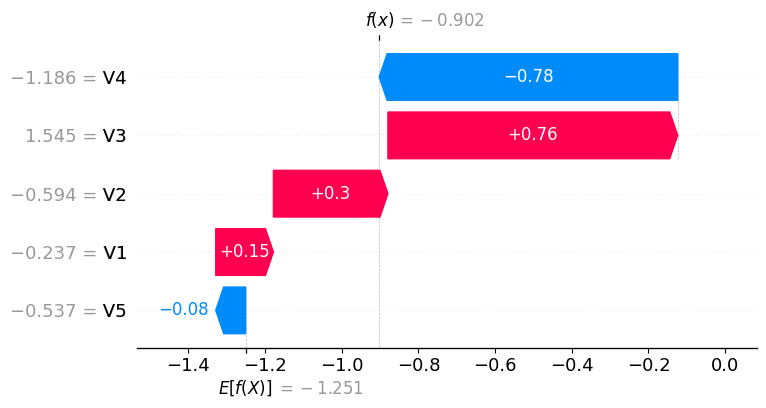</img> |

We see that both `V2` and `V3` are positive while `V4` and `V5` are negative. It is not an exact correspondence but these explanations are close to each other.

| id | LIME | SHAP |
|:--:|:----:|:----:|
| 2392 | 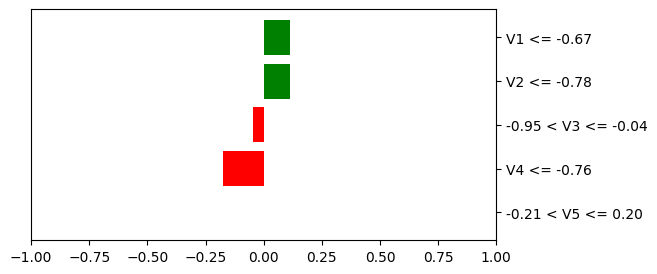</img> |  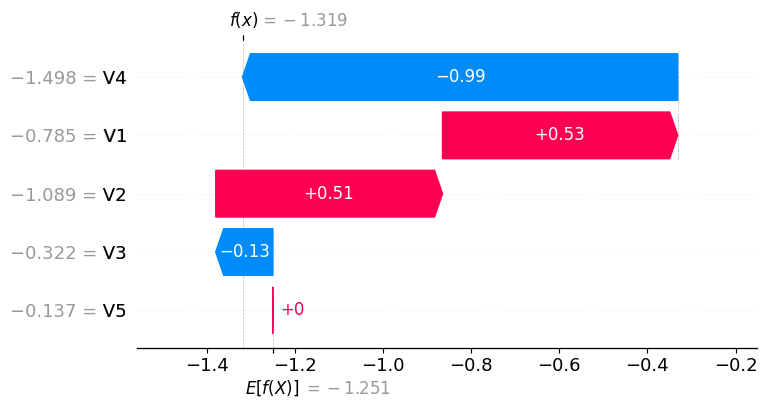</img> | 

There are, of course, more examples of that sort.

### Random forest

Marginal contribution works a bit different for the random forest model. This leads to LIME and SHAP disagreements, which is illustrated below:

| id | LIME | SHAP |
|:--:|:----:|:----:|
| 803 | 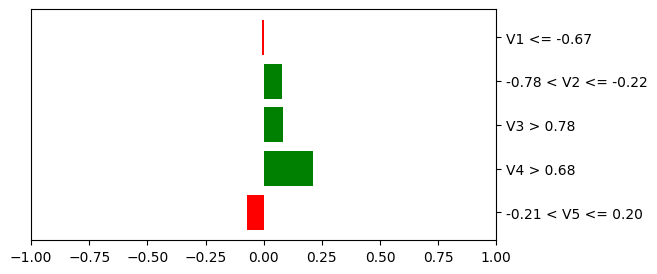</img> | 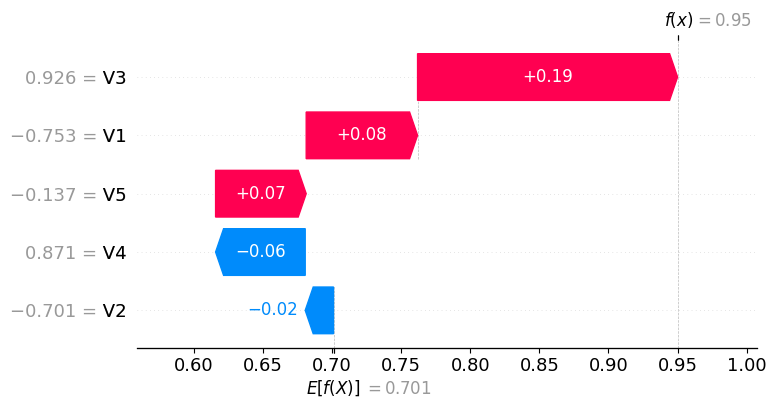</img> |

Both methods disagree on what is the strongest contributor and, in case of `V2`, `V4` and `V5`, even on a direction of the contribution. `XGBClassifier` has many similar examples. 

## Conclusion

SHAP values describe marginal contribution of each component (with different combinations of contributors). However, LIME works in a different way, estimating an impact of in a local neighborhood of an observation, by perturbating observation values and comparing model predictions of such values.

These values are not directly comparable, but under certain conditions, they may agree to some extent, as the logistic regression model shows.

## Use case

We've selected some observations. Now let us use LIME values to understand why `RandomForestClassifier` made a mistake for observations correctly tackled by `LogisticRegression`.

|      |    V1 |   V2 |   V3 |    V4 |    V5 |   TARGET |   LogisticRegression |   RandomForestClassifier |   XGBClassifier |   TabPFNClassifier |   variance |   error |
|-----:|------:|-----:|-----:|------:|------:|---------:|---------------------:|-------------------------:|----------------:|-------------------:|-----------:|--------:|
| 1552 | -0.55 | 0.46 | 1.62 | -1.27 | -0.14 |     1.00 |                 0.10 |                     0.97 |            1.00 |               0.98 |       0.15 |    2.91 |


| `LogisticRegression` | `RandomForestClassifier` |
|:--------------------:|:------------------------:|
| 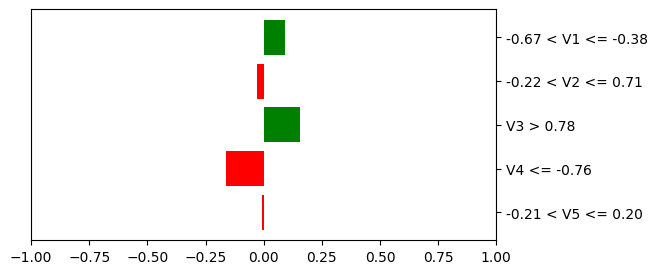</img> | 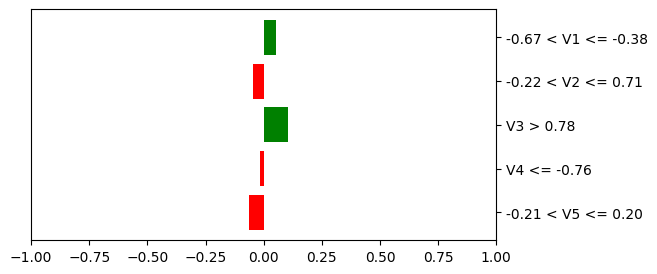</img> |

Both models agree on all columns except the decisive one, `V4`, which happens to be the strongest variable. 

Thanks to this information we could:
* find similar observations to `#1552` and see how they are classified
* compare `RandomForestClassifier` behavior in this region and see how well it works
* debug the influence of `V4` variable in the neighborhood of `#1552`

This is beyond the scope of the homework and we leave that as it is.

# Appendix

## Package import

In [1]:
import random

import shap
import dalex as dx
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from tabpfn import TabPFNClassifier

from tqdm.notebook import tqdm

## Constants

In [2]:
RANDOM_STATE = 42
NUMBER_OF_OBSERVATIONS = 15
SAMPLE_SIZE = 250

NUM_COLUMNS = 5
NUM_SAMPLES = 1000
FIGSIZE = (6, 3)

In [3]:
def seed(random_state=RANDOM_STATE):
    np.random.seed(random_state)
    random.seed(random_state)
    
    
seed()

## Data loading

In [4]:
df = pd.read_csv('datasets/phoneme.csv').iloc[:, 1:]
X = df.iloc[:, :-1]
y = df.iloc[:, -1].to_numpy() - 1

assert tuple(sorted(np.unique(y))) == (0, 1)

In [5]:
print(f'Dataset size: {len(y)} observations.')

Dataset size: 5404 observations.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.75, random_state=RANDOM_STATE
)

In [7]:
sample_indices = np.random.choice(df.index, SAMPLE_SIZE)

## Model training

In [9]:
logistic_regression = LogisticRegression(random_state=RANDOM_STATE)
logistic_regression.fit(X_train, y_train)

random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
random_forest.fit(X_train, y_train)

xgb = XGBClassifier(random_state=RANDOM_STATE)
xgb.fit(X_train, y_train)

tab_pfn = TabPFNClassifier(device='cpu', N_ensemble_configurations=32)
tab_pfn.fit(X_train, y_train, overwrite_warning=True)

display()

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


## Predictions and prediction errors

In [10]:
def get_proba_and_errors(model, X_test=X_test, y_test=y_test):
    y_pred = model.predict_proba(X_test)[:, 1]
    return y_pred, (y_pred - y_test) ** 2

In [11]:
logistic_regression_pred, logistic_regression_errors = get_proba_and_errors(logistic_regression)
random_forest_pred,       random_forest_errors       = get_proba_and_errors(random_forest)
xgb_pred,                 xgb_errors                 = get_proba_and_errors(xgb)
tab_pfn_pred,             tab_pfn_errors             = get_proba_and_errors(tab_pfn)

In [12]:
df_pred   = pd.DataFrame([logistic_regression_pred,   random_forest_pred,   xgb_pred,   tab_pfn_pred  ]).T
df_errors = pd.DataFrame([logistic_regression_errors, random_forest_errors, xgb_errors, tab_pfn_errors]).T

df_pred.columns   = ['LogisticRegression', 'RandomForestClassifier', 'XGBClassifier', 'TabPFNClassifier']
df_errors.columns = ['LogisticRegression', 'RandomForestClassifier', 'XGBClassifier', 'TabPFNClassifier']

variance = np.var(df_pred, axis=1)
total = np.sum(df_errors, axis=1)

df_pred['variance'] = variance
df_errors['error'] = total

## Sample collecting

In [13]:
seed()
indices = list(np.random.choice(df_errors.index, NUMBER_OF_OBSERVATIONS // 3))

In [14]:
df_pred_top = df_pred.sort_values('variance', ascending=False).head(NUMBER_OF_OBSERVATIONS // 3)

indices.extend(df_pred_top.index)
display(df_pred_top)

,LogisticRegression,RandomForestClassifier,XGBClassifier,TabPFNClassifier,variance
1552,0.096915,0.97,0.997193,0.981797,0.147307
2392,0.100094,0.97,0.991902,0.965859,0.143924
157,0.112273,0.91,0.995893,0.980029,0.136418
2813,0.121759,0.92,0.996616,0.952768,0.131375
3102,0.098721,0.84,0.985671,0.939502,0.129771


In [15]:
df_errors_top = df_errors.sort_values('error', ascending=False).head(NUMBER_OF_OBSERVATIONS // 3)

indices.extend(df_errors_top.index)
display(df_errors_top)

,LogisticRegression,RandomForestClassifier,XGBClassifier,TabPFNClassifier,error
1299,0.955875,0.9801,0.999413,0.992989,3.928377
2914,0.954347,0.9801,0.999683,0.992562,3.926692
416,0.909995,1.0000,0.998625,0.995772,3.904391
3022,0.954380,0.9409,0.999683,0.991938,3.886901
2829,0.882356,1.0000,0.998846,0.993345,3.874547


In [16]:
df_observations = pd.merge(
    df.loc[indices],
    df_pred.loc[indices],
    left_index=True,
    right_index=True
).merge(
    df_errors[['error']],
    left_index=True,
    right_index=True
)

df_observations

,V1,V2,V3,V4,V5,TARGET,LogisticRegression,RandomForestClassifier,XGBClassifier,TabPFNClassifier,variance,error
3174,1.344327,0.263042,-1.171170,-0.221492,-0.312070,1,0.135482,0.05,0.012702,0.016467,0.002442,0.021288
3507,2.200125,-0.391748,-1.067369,-0.594245,-0.223830,1,0.124309,0.03,0.000142,0.001982,0.002560,0.016357
860,-0.753484,-0.701102,0.926483,0.871314,-0.136583,1,0.596135,0.55,0.613609,0.859307,0.014486,0.534699
1294,-0.596311,-0.477304,1.682110,0.493600,-1.235860,2,0.516786,0.88,0.989788,0.874462,0.031811,0.263760
1130,0.221449,1.430543,-1.264106,0.034341,1.635539,1,0.184514,0.38,0.147287,0.675601,0.043839,0.656576
1552,-0.553795,0.459280,1.619252,-1.268399,-0.136583,1,0.096915,0.97,0.997193,0.981797,0.147307,2.908613
2392,-0.784762,-1.089178,-0.321573,-1.497742,-0.136583,1,0.100094,0.97,0.991902,0.965859,0.143924,2.867673
157,0.574505,-0.031709,-0.358881,-0.029576,-0.815318,1,0.112273,0.91,0.995893,0.980029,0.136418,2.792966
2813,0.153374,1.300046,-1.359490,-0.730233,-0.312189,2,0.121759,0.92,0.996616,0.952768,0.131375,0.779950
3102,-0.261839,-0.824677,1.649498,0.906567,0.830566,2,0.098721,0.84,0.985671,0.939502,0.129771,0.841770


In [17]:
print(
    'Class imbalance in the sample: {y1:.2f}%, the general imbalance is {y2:.2f}%.'.format(
        y1=100 * y[indices].mean(),
        y2=100 * y.mean()
    )
)

Class imbalance in the sample: 33.33%, the general imbalance is 29.35%.


### Sample collecting

In [18]:
lr_explainer = dx.Explainer(logistic_regression, X, y)
display(lr_explainer.model_performance(cutoff=y.mean()))

rf_explainer = dx.Explainer(random_forest, X, y)
display(rf_explainer.model_performance(cutoff=y.mean()))

xgb_explainer = dx.Explainer(xgb, X, y)
display(xgb_explainer.model_performance(cutoff=y.mean()))

pfn_explainer = dx.Explainer(tab_pfn, X, y)
display(pfn_explainer.model_performance(cutoff=y.mean()))

Preparation of a new explainer is initiated

  -> data              : 5404 rows 5 cols
  -> target variable   : 5404 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f80c99731a0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0126, mean = 0.306, max = 0.876
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.876, mean = -0.0122, max = 0.978
  -> model_info        : package sklearn

A new explainer has been created!


X does not have valid feature names, but LogisticRegression was fitted with feature names


,recall,precision,f1,accuracy,auc
LogisticRegression,0.773014,0.531657,0.63001,0.733531,0.808701


Preparation of a new explainer is initiated

  -> data              : 5404 rows 5 cols
  -> target variable   : 5404 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f80c99731a0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


  -> predicted values  : min = 0.0, mean = 0.307, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.98, mean = -0.014, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


,recall,precision,f1,accuracy,auc
RandomForestClassifier,0.940731,0.708116,0.808015,0.868801,0.955736


Preparation of a new explainer is initiated

  -> data              : 5404 rows 5 cols
  -> target variable   : 5404 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f80c99731a0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.46e-05, mean = 0.3, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.999, mean = -0.00673, max = 1.0
  -> model_info        : package xgboost

A new explainer has been created!


,recall,precision,f1,accuracy,auc
XGBClassifier,0.883985,0.767798,0.821805,0.887491,0.947728


Preparation of a new explainer is initiated

  -> data              : 5404 rows 5 cols
  -> target variable   : 5404 values
  -> model_class       : tabpfn.scripts.transformer_prediction_interface.TabPFNClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f80c99731a0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00012, mean = 0.31, max = 0.998
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.99, mean = -0.0162, max = 0.998
  -> model_info        : package tabpfn

A new explainer has been created!


,recall,precision,f1,accuracy,auc
TabPFNClassifier,0.904161,0.697471,0.787479,0.856773,0.943306


## SHAP values

In [19]:
shap_lr_explainer = shap.Explainer(logistic_regression, X_train)
shap_lr_values = shap_lr_explainer(X)

shap_rf_explainer = shap.Explainer(random_forest, X_train)
shap_rf_values = shap_rf_explainer(X)

shap_xgb_explainer = shap.Explainer(xgb, X_train)
shap_xgb_values = shap_xgb_explainer(X)

 96%|=================== | 5172/5404 [00:11<00:00]         

In [20]:
def sort_explainables(explanation, columns=df.columns):
    values = next(iter(explanation.as_map().values()))
    order = dict([(key, index) for index, (key, value) in enumerate(values)])
    dictionary = dict(sorted([
        (columns[key], value)
        for key, value in values
    ]))
    
    return order, dictionary

In [21]:
def get_sorted_explainables(explanation):
    order, dictionary = sort_explainables(explanation)
    result = explanation.result
    return result.loc[result.index.map(order)].set_index('variable')

In [22]:
def plot_explanation(
    explainer,
    observation,
    draw_plot: bool = True,
    num_samples: int = NUM_SAMPLES
):
    explanation = explainer.predict_surrogate(observation, num_samples=num_samples)
    result = explanation.result

    if draw_plot:
        result = get_sorted_explainables(explanation).iloc[::-1]
        colors = (result['effect'] > 0).map({False: 'red', True: 'green'})
        
        # explanation.plot method is not easily customizable
        plt.figure(figsize=FIGSIZE)
        plt.gca().yaxis.set_label_position('right')
        plt.gca().yaxis.tick_right()
        plt.barh(result.index, result['effect'], color=colors)
        plt.xlim([-1.0, 1.0])
        plt.show()

In [23]:
def show_explainables(explainer, X=X, indices=indices, num_samples: int = NUM_SAMPLES):
    seed()
    for index in indices:    
        observation = X.loc[index]
        display(df.loc[[index]])
        plot_explanation(explainer, observation, num_samples=num_samples)

### LIME stability for Logistic Regression

In [24]:
variances = []
for index in tqdm(sample_indices):
    observation = X.loc[index]
    results = []
    for i in range(25):
        explanation = lr_explainer.predict_surrogate(observation, num_samples=NUM_SAMPLES)
        result = get_sorted_explainables(explanation).reset_index(drop=True)
        results.append(result)
        
    variances.append(np.var(pd.concat(results, axis=1), axis=1))

  0%|          | 0/250 [00:00<?, ?it/s]

In [25]:
np.sqrt(np.sum(pd.concat(variances, axis=1), axis=1) / len(variances))

0    0.010810
1    0.011232
2    0.011175
3    0.010665
4    0.011582
dtype: float64

## LIME

### Linear regression

,V1,V2,V3,V4,V5,TARGET
3174,1.344327,0.263042,-1.17117,-0.221492,-0.31207,1


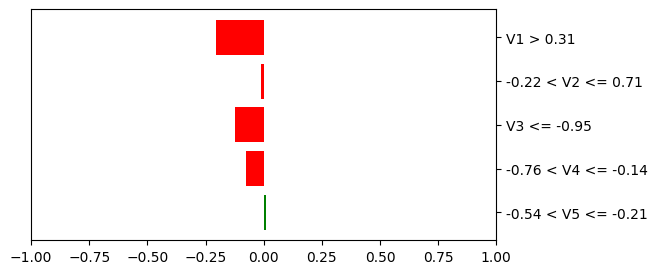

,V1,V2,V3,V4,V5,TARGET
3507,2.200125,-0.391748,-1.067369,-0.594245,-0.22383,1


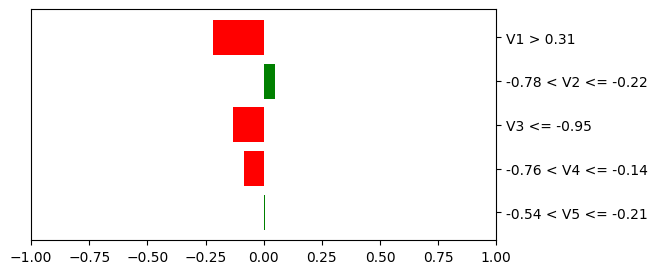

,V1,V2,V3,V4,V5,TARGET
860,-0.753484,-0.701102,0.926483,0.871314,-0.136583,1


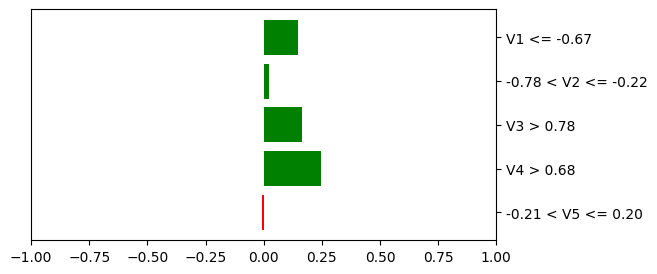

,V1,V2,V3,V4,V5,TARGET
1294,-0.596311,-0.477304,1.68211,0.4936,-1.23586,2


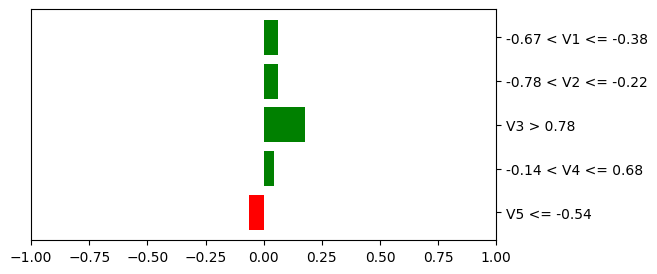

,V1,V2,V3,V4,V5,TARGET
1130,0.221449,1.430543,-1.264106,0.034341,1.635539,1


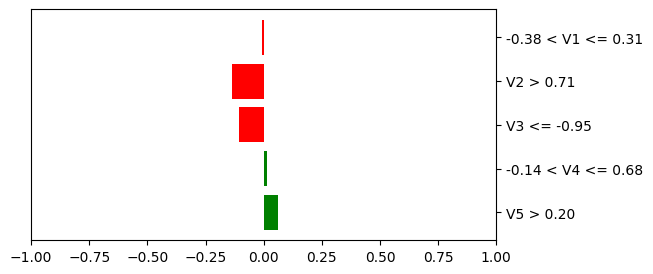

,V1,V2,V3,V4,V5,TARGET
1552,-0.553795,0.45928,1.619252,-1.268399,-0.136583,1


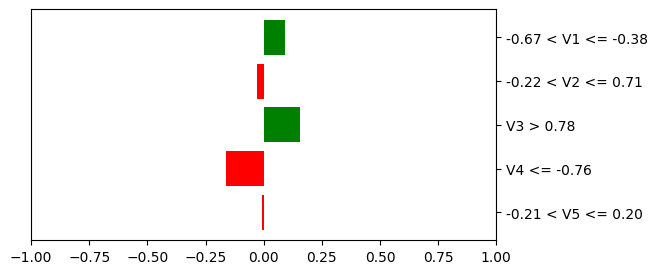

,V1,V2,V3,V4,V5,TARGET
2392,-0.784762,-1.089178,-0.321573,-1.497742,-0.136583,1


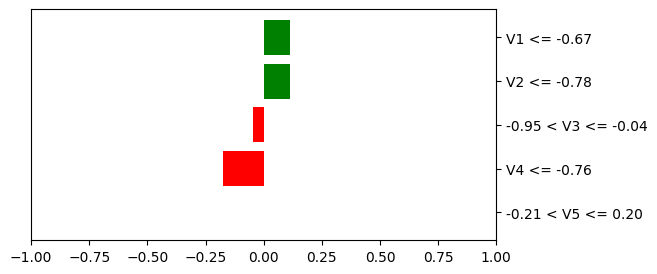

,V1,V2,V3,V4,V5,TARGET
157,0.574505,-0.031709,-0.358881,-0.029576,-0.815318,1


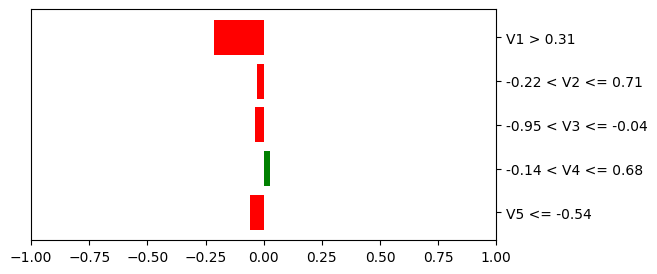

,V1,V2,V3,V4,V5,TARGET
2813,0.153374,1.300046,-1.35949,-0.730233,-0.312189,2


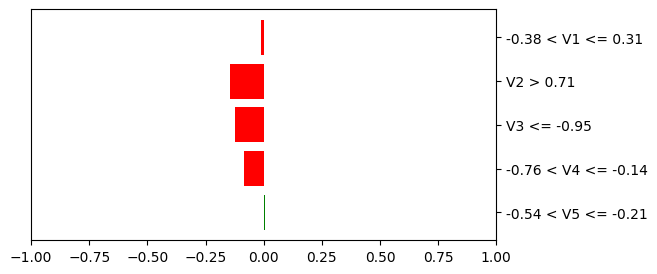

,V1,V2,V3,V4,V5,TARGET
3102,-0.261839,-0.824677,1.649498,0.906567,0.830566,2


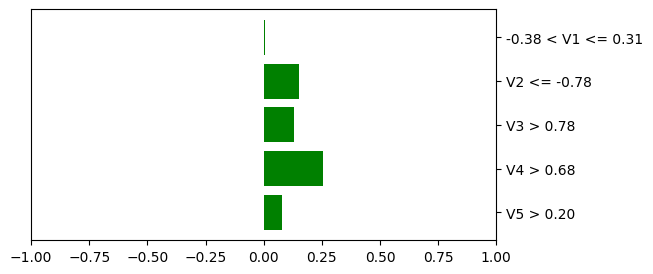

,V1,V2,V3,V4,V5,TARGET
1299,-0.236732,-0.594257,1.544963,-1.186315,-0.536999,2


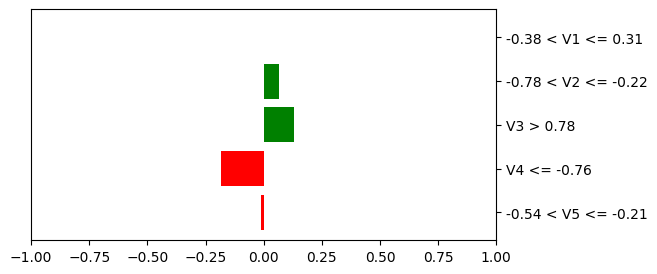

,V1,V2,V3,V4,V5,TARGET
2914,-0.777622,-0.295839,0.262987,-0.118778,-0.136583,1


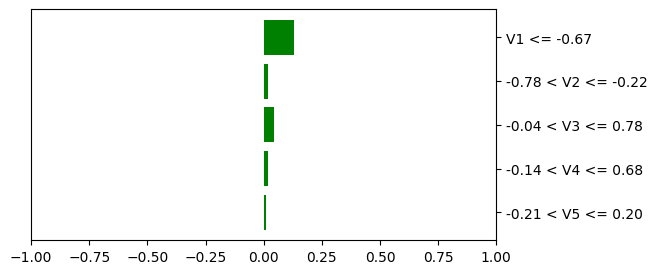

,V1,V2,V3,V4,V5,TARGET
416,-0.847626,-1.05581,-0.289216,-1.872634,-0.136583,1


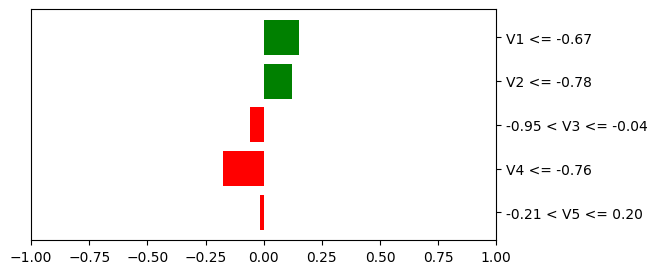

,V1,V2,V3,V4,V5,TARGET
3022,-0.598224,-0.375108,0.942325,-1.732816,2.614465,2


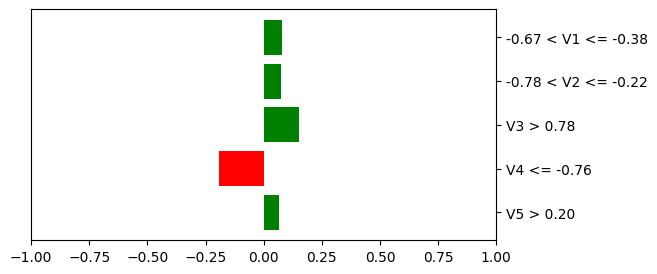

,V1,V2,V3,V4,V5,TARGET
2829,-0.687936,-0.938647,0.932945,1.108643,1.099898,1


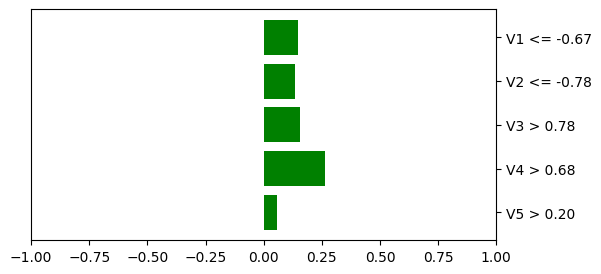

In [26]:
show_explainables(lr_explainer)

In [27]:
def get_explainables(explainer, X=X, indices=indices):
    seed()
    results = []
    for i in tqdm(indices):
        observation = X.loc[i]
        explanation = explainer.predict_surrogate(observation, num_samples=NUM_SAMPLES)
        order, dictionary = sort_explainables(explanation)
        result = explanation.result
        result = result.loc[explanation.result.index.map(order)].set_index('variable').reset_index(drop=True)
        results.append(result)
        
    return results

In [28]:
def prepare_results(results, series: pd.Series, names: list[str]):
    df_results = pd.DataFrame([
        series,
        np.mean(abs(pd.concat(results, axis=1)), axis=1)
    ]).T

    df_results.index = df.columns[:NUM_COLUMNS]
    df_results = df_results.reset_index()
    df_results.columns = names
    return df_results.set_index('column')    

In [29]:
def calculate_correlation(df):
    return df.corr().iloc[0, 1]

In [30]:
lr_results = get_explainables(lr_explainer, indices=sample_indices)
lr_series = pd.Series(logistic_regression.coef_[0])
df_lr = prepare_results(lr_results, lr_series, [
    'column', 'logistic regression coefficient', 'LIME mean'
])

df_lr

  0%|          | 0/250 [00:00<?, ?it/s]

,logistic regression coefficient,LIME mean
column,,
V1,-0.699783,0.110007
V2,-0.436966,0.081500
V3,0.474551,0.090017
V4,0.672585,0.126876
V5,0.195841,0.036118


In [31]:
print(
    'Correlation coefficient: {:.2f}%.'.format(
        100 * calculate_correlation(abs(df_lr))
    )
)

Correlation coefficient: 97.08%.


### Random forest

,V1,V2,V3,V4,V5,TARGET
3174,1.344327,0.263042,-1.17117,-0.221492,-0.31207,1


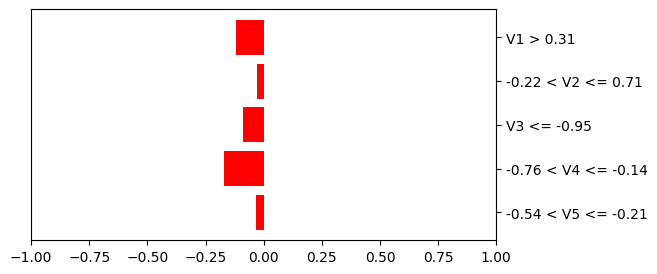

,V1,V2,V3,V4,V5,TARGET
3507,2.200125,-0.391748,-1.067369,-0.594245,-0.22383,1


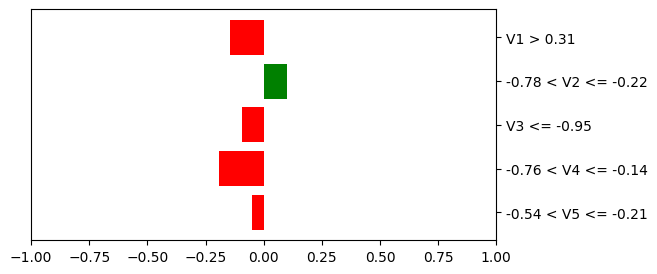

,V1,V2,V3,V4,V5,TARGET
860,-0.753484,-0.701102,0.926483,0.871314,-0.136583,1


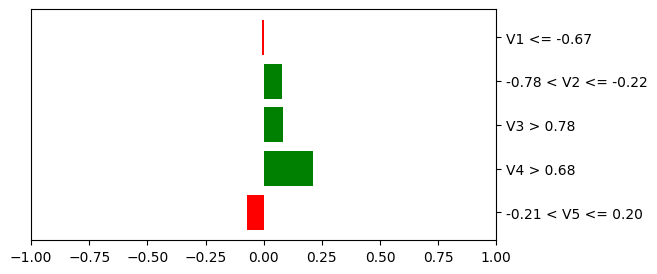

,V1,V2,V3,V4,V5,TARGET
1294,-0.596311,-0.477304,1.68211,0.4936,-1.23586,2


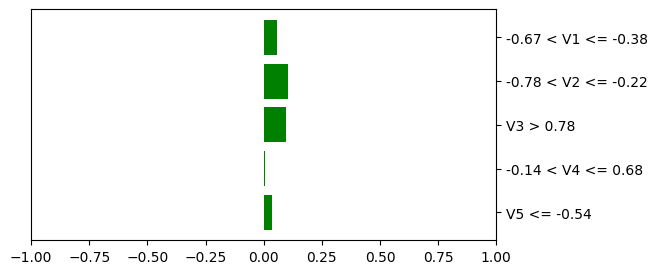

,V1,V2,V3,V4,V5,TARGET
1130,0.221449,1.430543,-1.264106,0.034341,1.635539,1


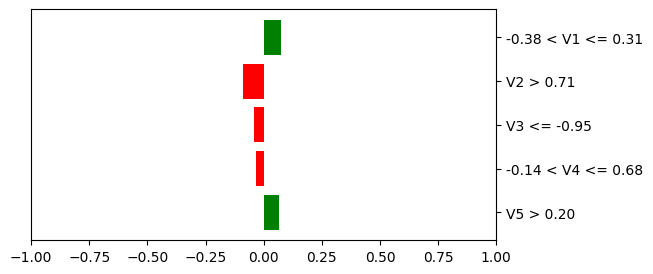

,V1,V2,V3,V4,V5,TARGET
1552,-0.553795,0.45928,1.619252,-1.268399,-0.136583,1


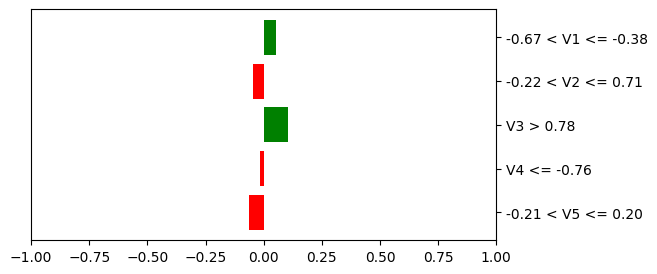

,V1,V2,V3,V4,V5,TARGET
2392,-0.784762,-1.089178,-0.321573,-1.497742,-0.136583,1


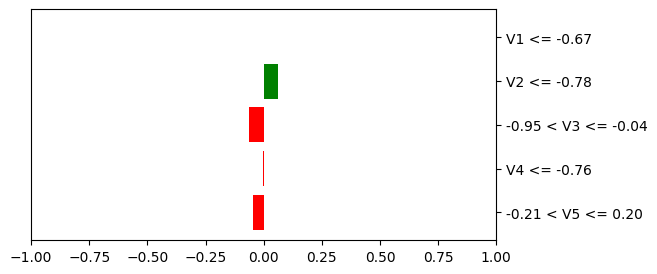

,V1,V2,V3,V4,V5,TARGET
157,0.574505,-0.031709,-0.358881,-0.029576,-0.815318,1


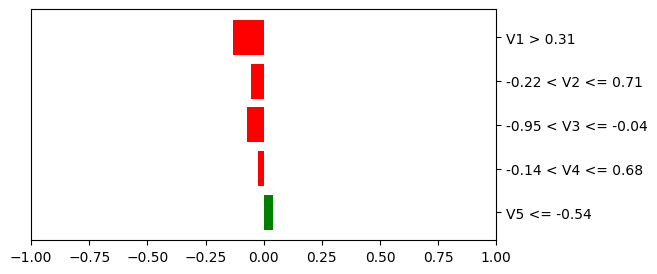

,V1,V2,V3,V4,V5,TARGET
2813,0.153374,1.300046,-1.35949,-0.730233,-0.312189,2


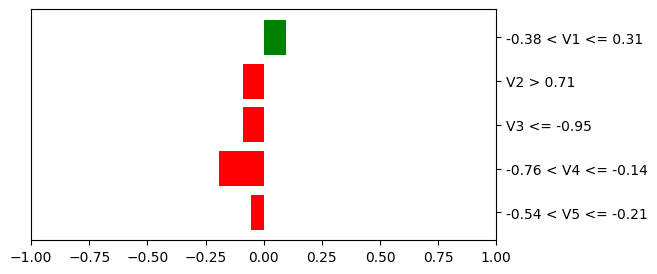

,V1,V2,V3,V4,V5,TARGET
3102,-0.261839,-0.824677,1.649498,0.906567,0.830566,2


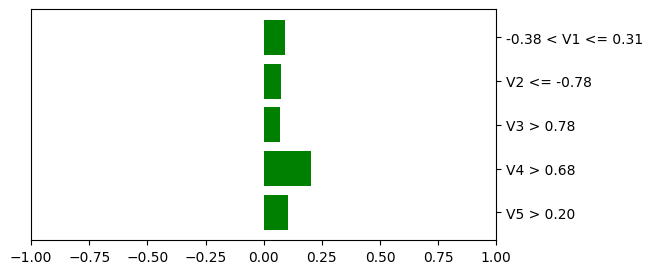

,V1,V2,V3,V4,V5,TARGET
1299,-0.236732,-0.594257,1.544963,-1.186315,-0.536999,2


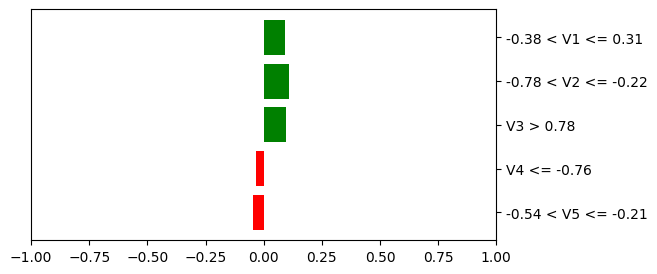

,V1,V2,V3,V4,V5,TARGET
2914,-0.777622,-0.295839,0.262987,-0.118778,-0.136583,1


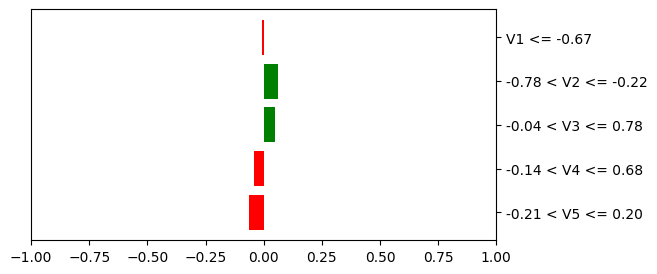

,V1,V2,V3,V4,V5,TARGET
416,-0.847626,-1.05581,-0.289216,-1.872634,-0.136583,1


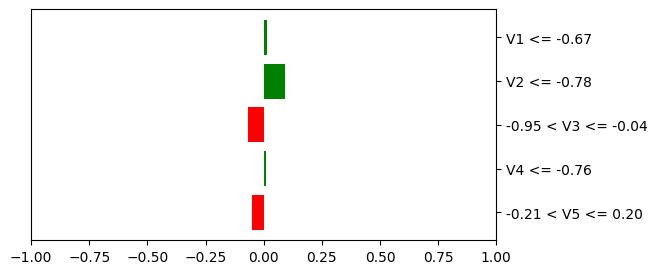

,V1,V2,V3,V4,V5,TARGET
3022,-0.598224,-0.375108,0.942325,-1.732816,2.614465,2


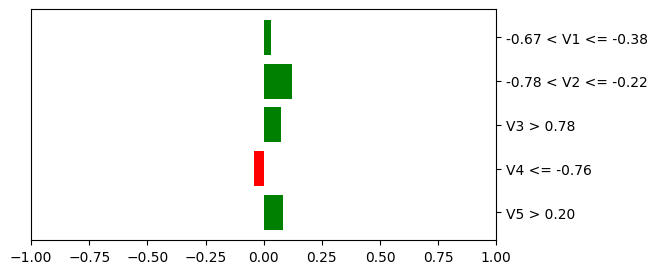

,V1,V2,V3,V4,V5,TARGET
2829,-0.687936,-0.938647,0.932945,1.108643,1.099898,1


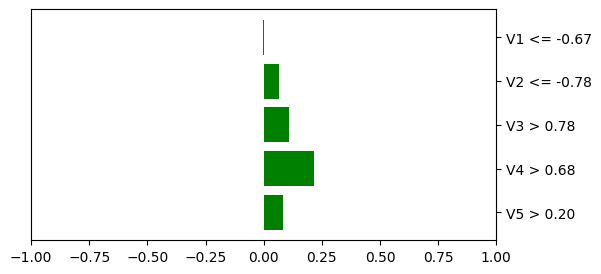

In [32]:
show_explainables(rf_explainer)

In [33]:
rf_results = get_explainables(rf_explainer, indices=sample_indices)
rf_series = pd.Series(random_forest.feature_importances_)
df_rf = prepare_results(rf_results, rf_series, [
    'column', 'feature importance', 'LIME mean'
])

df_rf

  0%|          | 0/250 [00:00<?, ?it/s]

,feature importance,LIME mean
column,,
V1,0.199188,0.074524
V2,0.162220,0.078785
V3,0.208704,0.079272
V4,0.301254,0.116559
V5,0.128634,0.056260


In [34]:
print(
    'Correlation coefficient: {:.2f}%.'.format(
        100 * calculate_correlation(df_rf)
    )
)

Correlation coefficient: 95.49%.


## XGBoost

,V1,V2,V3,V4,V5,TARGET
3174,1.344327,0.263042,-1.17117,-0.221492,-0.31207,1


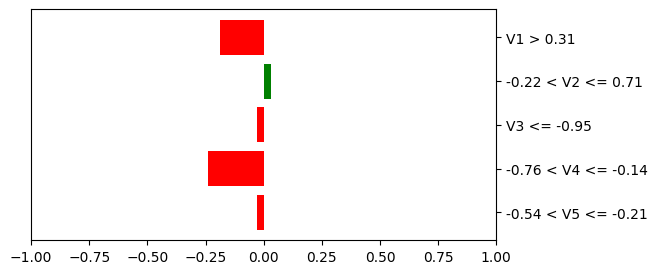

,V1,V2,V3,V4,V5,TARGET
3507,2.200125,-0.391748,-1.067369,-0.594245,-0.22383,1


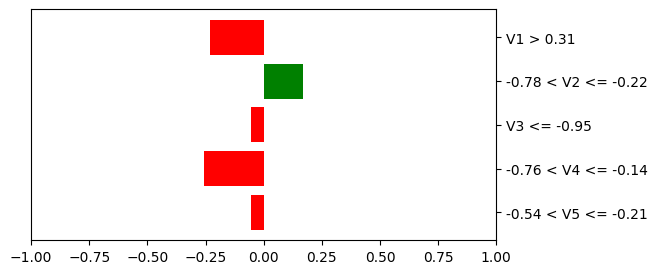

,V1,V2,V3,V4,V5,TARGET
860,-0.753484,-0.701102,0.926483,0.871314,-0.136583,1


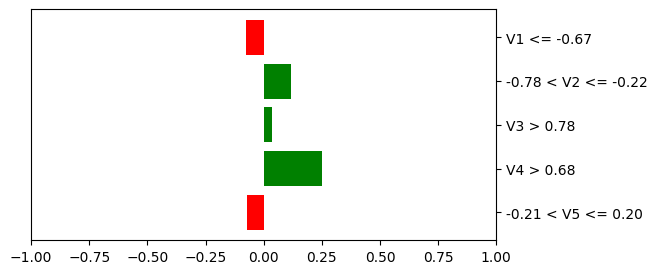

,V1,V2,V3,V4,V5,TARGET
1294,-0.596311,-0.477304,1.68211,0.4936,-1.23586,2


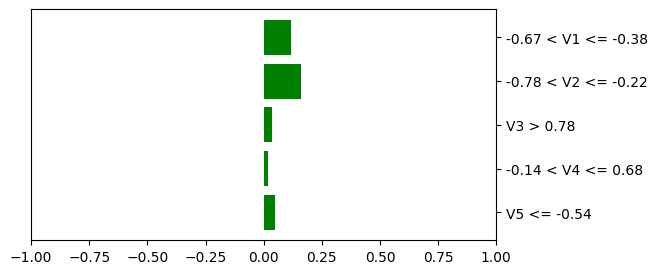

,V1,V2,V3,V4,V5,TARGET
1130,0.221449,1.430543,-1.264106,0.034341,1.635539,1


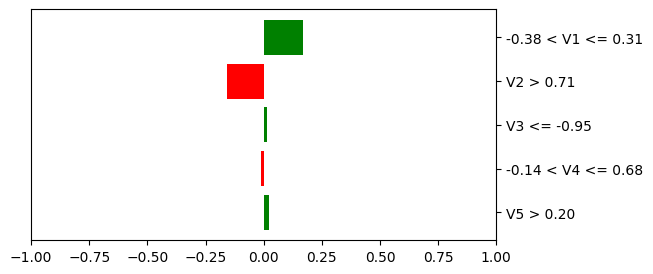

,V1,V2,V3,V4,V5,TARGET
1552,-0.553795,0.45928,1.619252,-1.268399,-0.136583,1


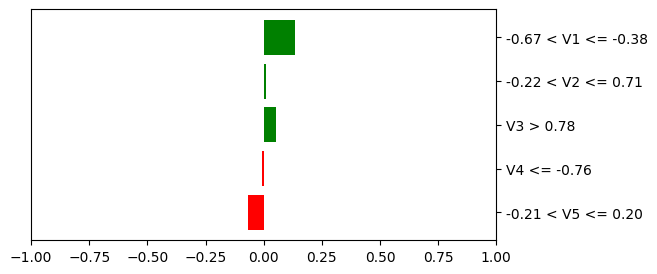

,V1,V2,V3,V4,V5,TARGET
2392,-0.784762,-1.089178,-0.321573,-1.497742,-0.136583,1


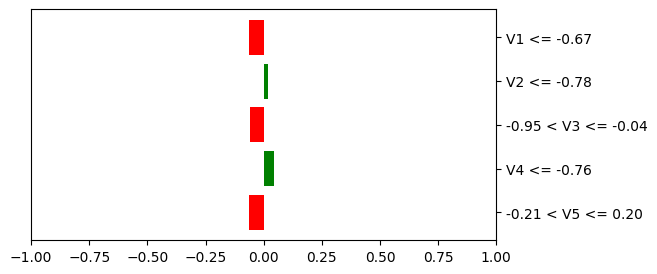

,V1,V2,V3,V4,V5,TARGET
157,0.574505,-0.031709,-0.358881,-0.029576,-0.815318,1


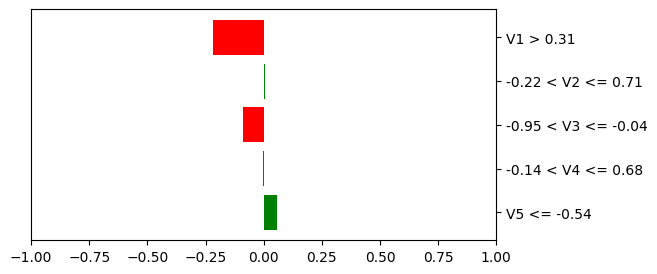

,V1,V2,V3,V4,V5,TARGET
2813,0.153374,1.300046,-1.35949,-0.730233,-0.312189,2


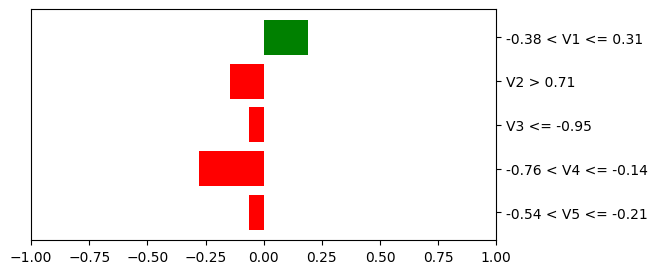

,V1,V2,V3,V4,V5,TARGET
3102,-0.261839,-0.824677,1.649498,0.906567,0.830566,2


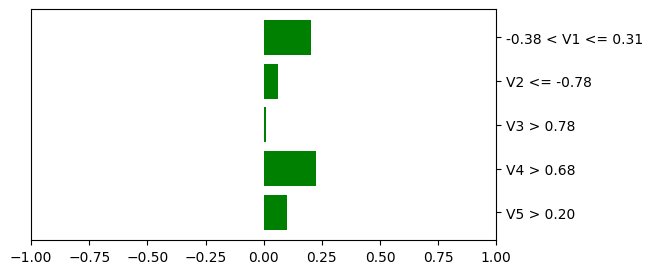

,V1,V2,V3,V4,V5,TARGET
1299,-0.236732,-0.594257,1.544963,-1.186315,-0.536999,2


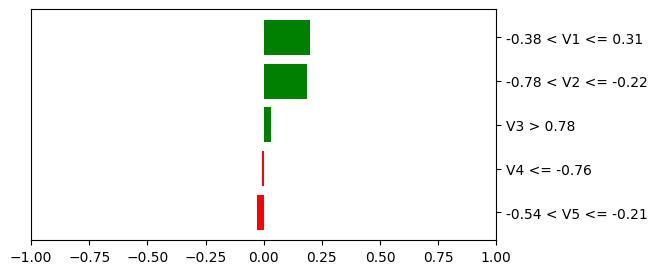

,V1,V2,V3,V4,V5,TARGET
2914,-0.777622,-0.295839,0.262987,-0.118778,-0.136583,1


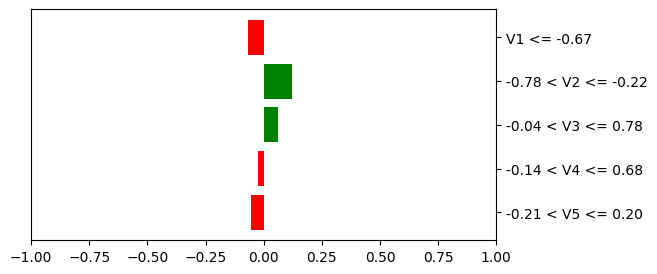

,V1,V2,V3,V4,V5,TARGET
416,-0.847626,-1.05581,-0.289216,-1.872634,-0.136583,1


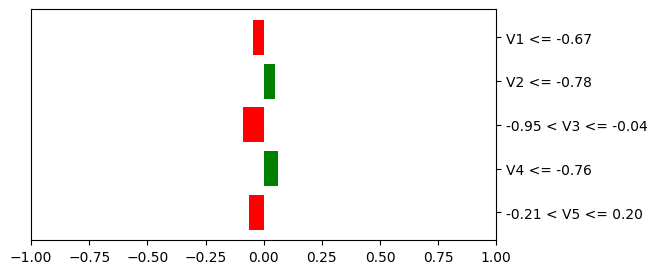

,V1,V2,V3,V4,V5,TARGET
3022,-0.598224,-0.375108,0.942325,-1.732816,2.614465,2


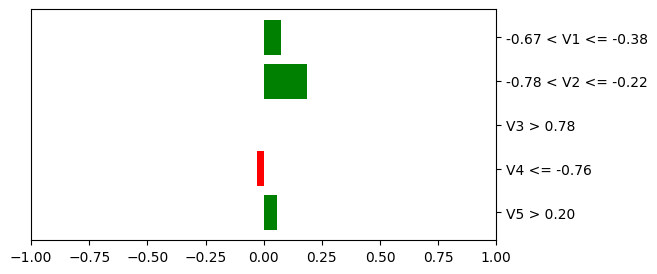

,V1,V2,V3,V4,V5,TARGET
2829,-0.687936,-0.938647,0.932945,1.108643,1.099898,1


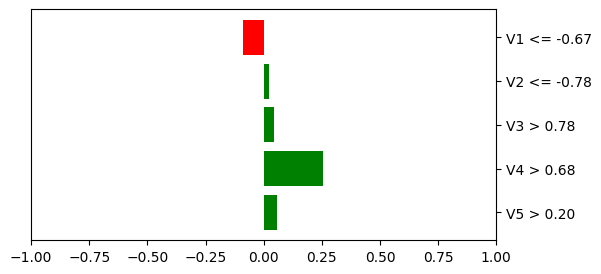

In [35]:
show_explainables(xgb_explainer)

In [36]:
xgb_results = get_explainables(xgb_explainer, indices=sample_indices)
xgb_series = pd.Series(xgb.feature_importances_)
df_xgb = prepare_results(xgb_results, xgb_series, [
    'column', 'feature importance', 'LIME mean'
])

df_xgb

  0%|          | 0/250 [00:00<?, ?it/s]

,feature importance,LIME mean
column,,
V1,0.166167,0.147629
V2,0.142739,0.099043
V3,0.151651,0.062731
V4,0.405486,0.150314
V5,0.133957,0.049092


In [37]:
print(
    'Correlation coefficient: {:.2f}%.'.format(
        100 * calculate_correlation(df_xgb)
    )
)

Correlation coefficient: 64.49%.


### TabPFN

,V1,V2,V3,V4,V5,TARGET
3174,1.344327,0.263042,-1.17117,-0.221492,-0.31207,1


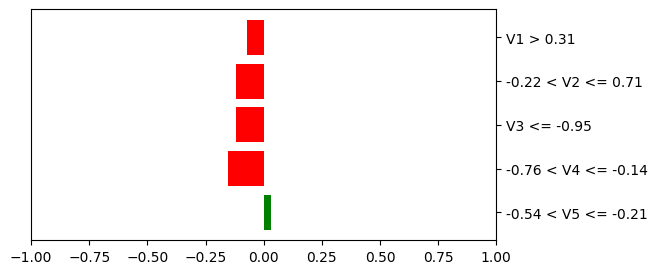

,V1,V2,V3,V4,V5,TARGET
3507,2.200125,-0.391748,-1.067369,-0.594245,-0.22383,1


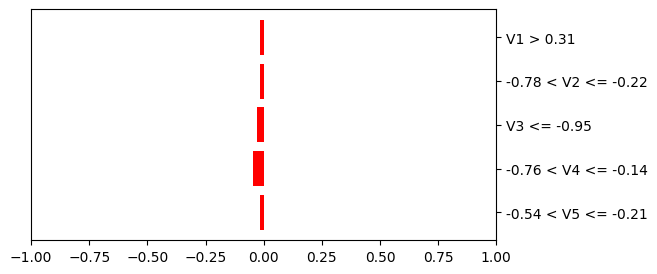

,V1,V2,V3,V4,V5,TARGET
860,-0.753484,-0.701102,0.926483,0.871314,-0.136583,1


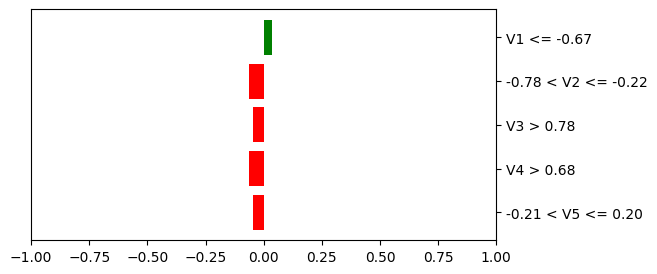

,V1,V2,V3,V4,V5,TARGET
1294,-0.596311,-0.477304,1.68211,0.4936,-1.23586,2


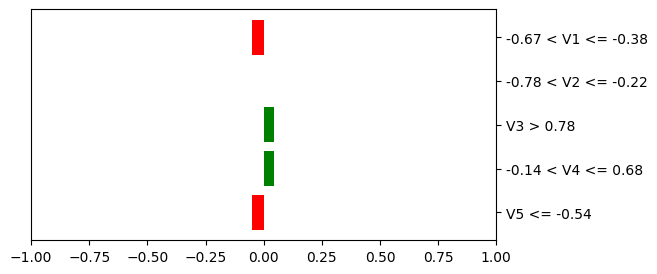

,V1,V2,V3,V4,V5,TARGET
1130,0.221449,1.430543,-1.264106,0.034341,1.635539,1


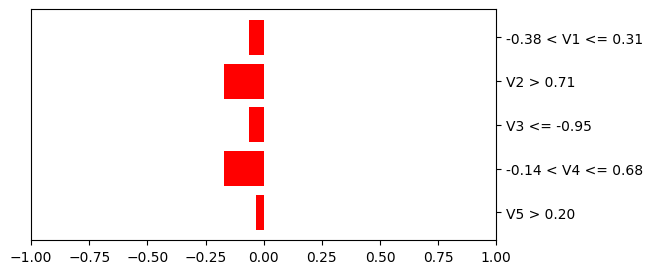

,V1,V2,V3,V4,V5,TARGET
1552,-0.553795,0.45928,1.619252,-1.268399,-0.136583,1


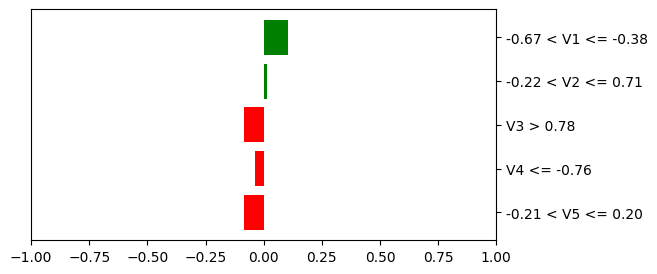

,V1,V2,V3,V4,V5,TARGET
2392,-0.784762,-1.089178,-0.321573,-1.497742,-0.136583,1


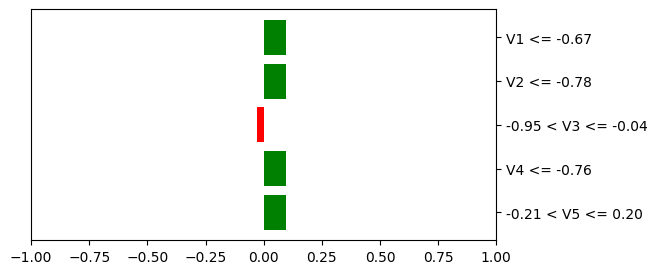

,V1,V2,V3,V4,V5,TARGET
157,0.574505,-0.031709,-0.358881,-0.029576,-0.815318,1


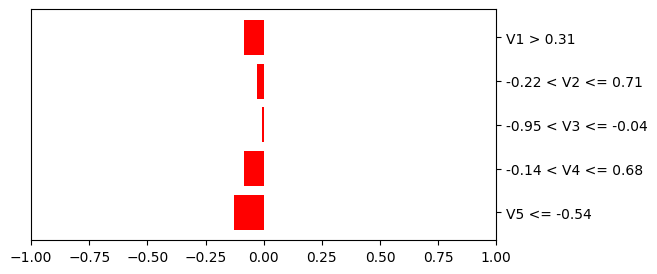

,V1,V2,V3,V4,V5,TARGET
2813,0.153374,1.300046,-1.35949,-0.730233,-0.312189,2


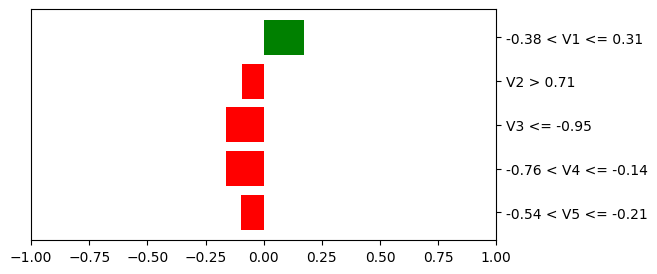

,V1,V2,V3,V4,V5,TARGET
3102,-0.261839,-0.824677,1.649498,0.906567,0.830566,2


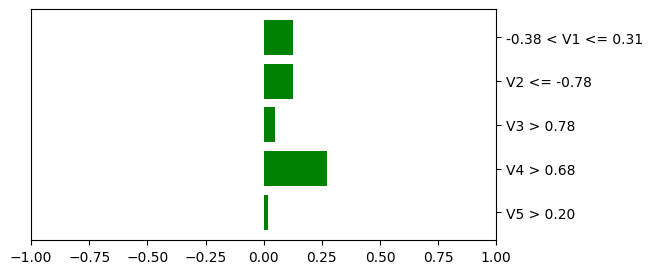

,V1,V2,V3,V4,V5,TARGET
1299,-0.236732,-0.594257,1.544963,-1.186315,-0.536999,2


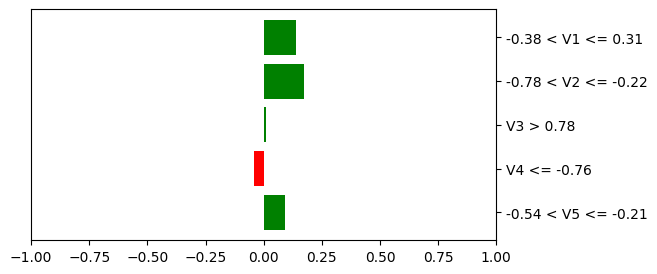

,V1,V2,V3,V4,V5,TARGET
2914,-0.777622,-0.295839,0.262987,-0.118778,-0.136583,1


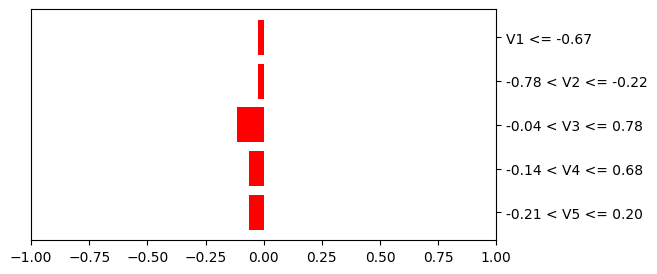

,V1,V2,V3,V4,V5,TARGET
416,-0.847626,-1.05581,-0.289216,-1.872634,-0.136583,1


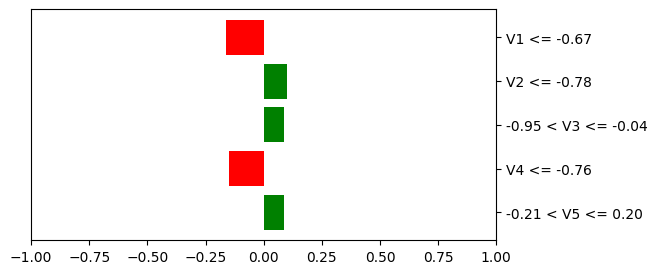

,V1,V2,V3,V4,V5,TARGET
3022,-0.598224,-0.375108,0.942325,-1.732816,2.614465,2


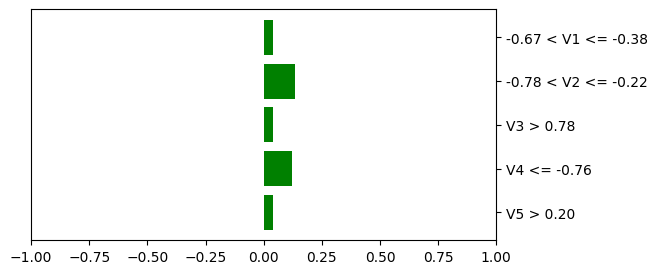

,V1,V2,V3,V4,V5,TARGET
2829,-0.687936,-0.938647,0.932945,1.108643,1.099898,1


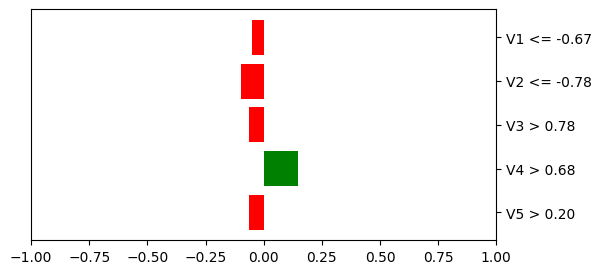

In [38]:
show_explainables(pfn_explainer, num_samples=5)

## SHAP values

### Overview of models

LogisticRegressions


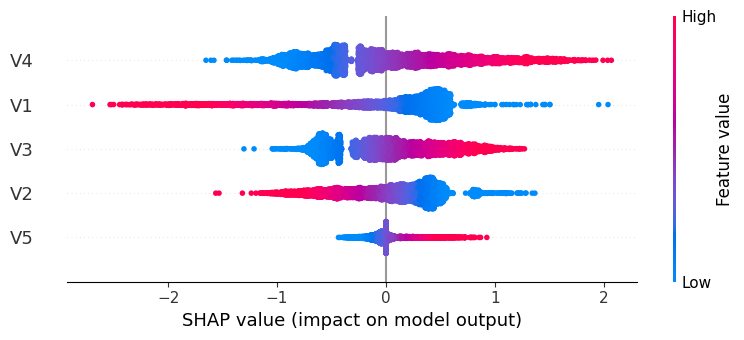

RandomForestClassifier


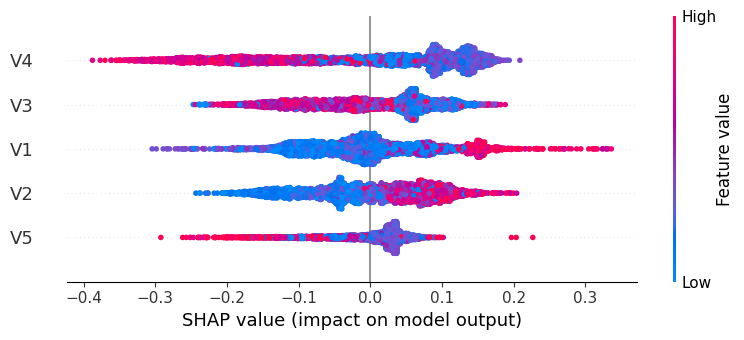

XGBClassifier


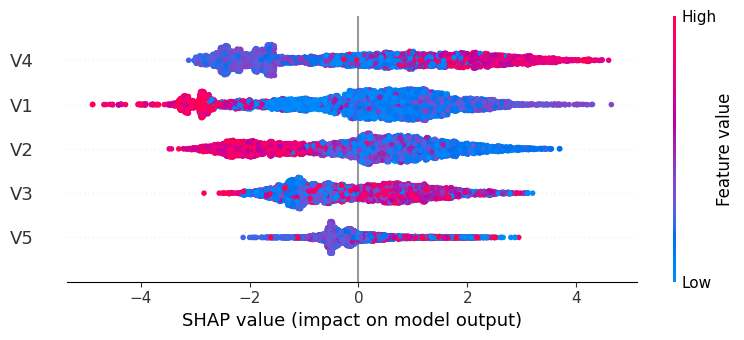

In [47]:
print('LogisticRegressions')
shap.summary_plot(shap_lr_values, sort=True)

print('RandomForestClassifier')
shap.summary_plot(shap_rf_values[:, :, 0], sort=True)

print('XGBClassifier')
shap.summary_plot(shap_xgb_values, sort=True)

In [48]:
def show_shap_values(shap_values, X=X, indices=indices):
    seed()
    for index in indices:    
        observation = X.loc[index]
        display(df.loc[[index]])
        shap.plots.waterfall(shap_values[index])

### Logistic regression

,V1,V2,V3,V4,V5,TARGET
3174,1.344327,0.263042,-1.17117,-0.221492,-0.31207,1


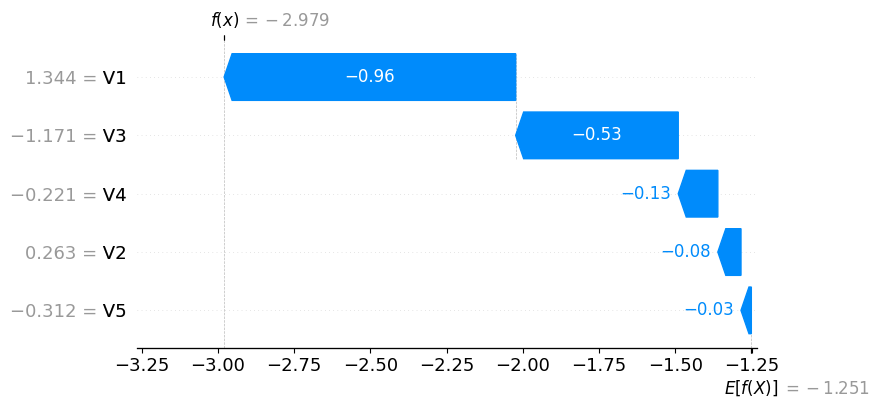

,V1,V2,V3,V4,V5,TARGET
3507,2.200125,-0.391748,-1.067369,-0.594245,-0.22383,1


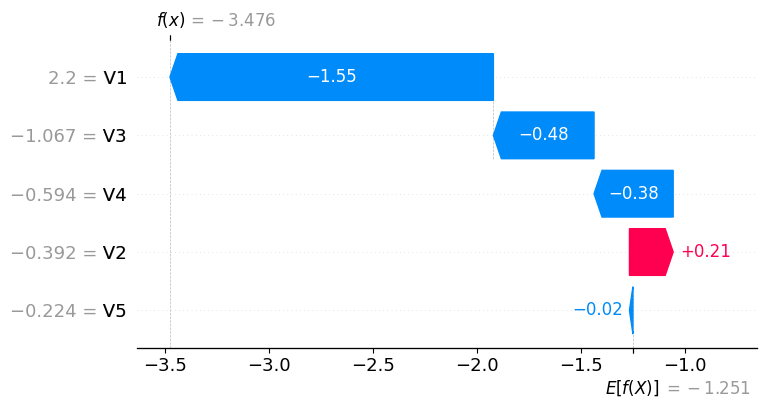

,V1,V2,V3,V4,V5,TARGET
860,-0.753484,-0.701102,0.926483,0.871314,-0.136583,1


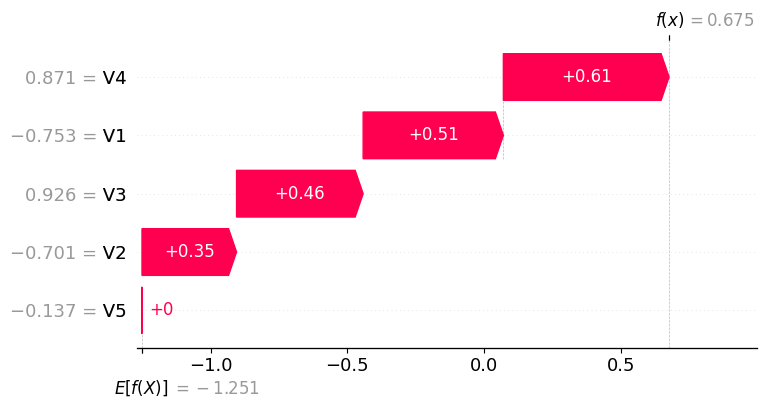

,V1,V2,V3,V4,V5,TARGET
1294,-0.596311,-0.477304,1.68211,0.4936,-1.23586,2


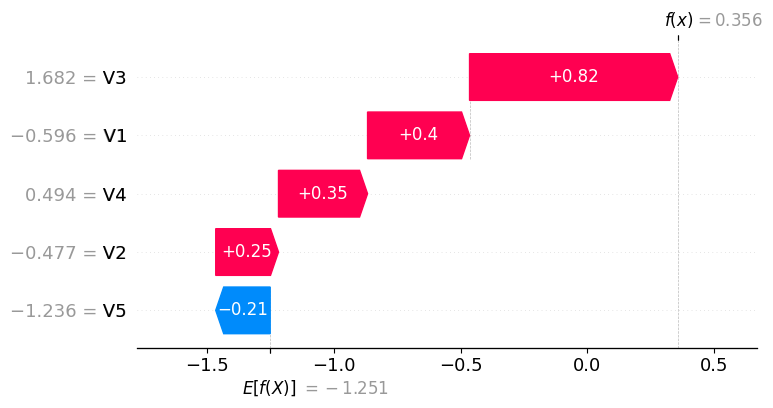

,V1,V2,V3,V4,V5,TARGET
1130,0.221449,1.430543,-1.264106,0.034341,1.635539,1


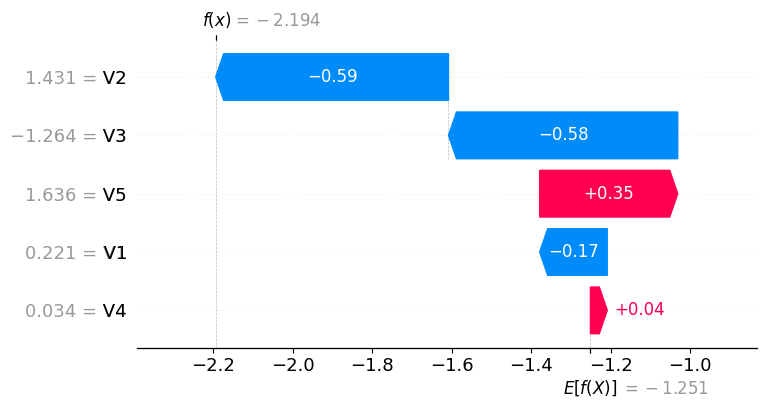

,V1,V2,V3,V4,V5,TARGET
1552,-0.553795,0.45928,1.619252,-1.268399,-0.136583,1


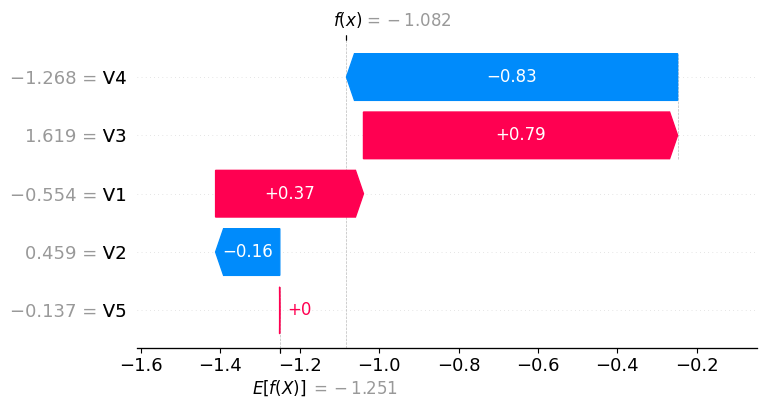

,V1,V2,V3,V4,V5,TARGET
2392,-0.784762,-1.089178,-0.321573,-1.497742,-0.136583,1


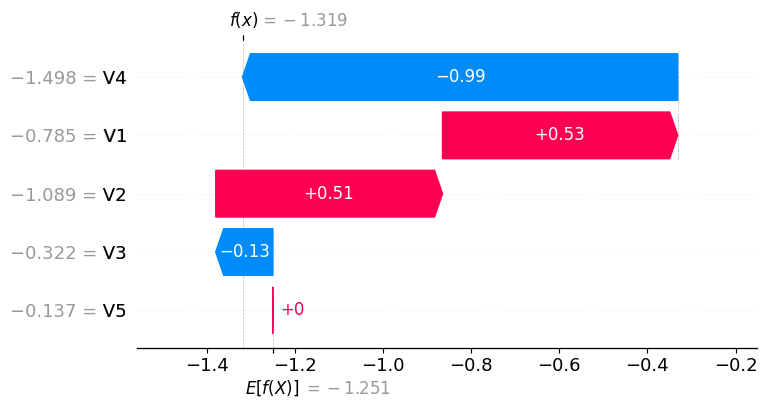

,V1,V2,V3,V4,V5,TARGET
157,0.574505,-0.031709,-0.358881,-0.029576,-0.815318,1


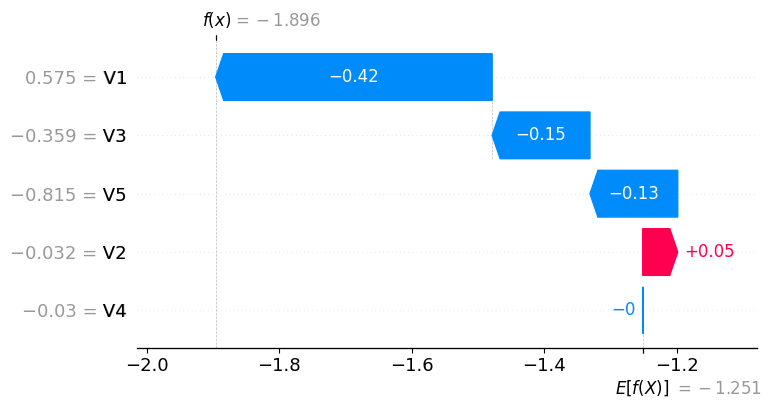

,V1,V2,V3,V4,V5,TARGET
2813,0.153374,1.300046,-1.35949,-0.730233,-0.312189,2


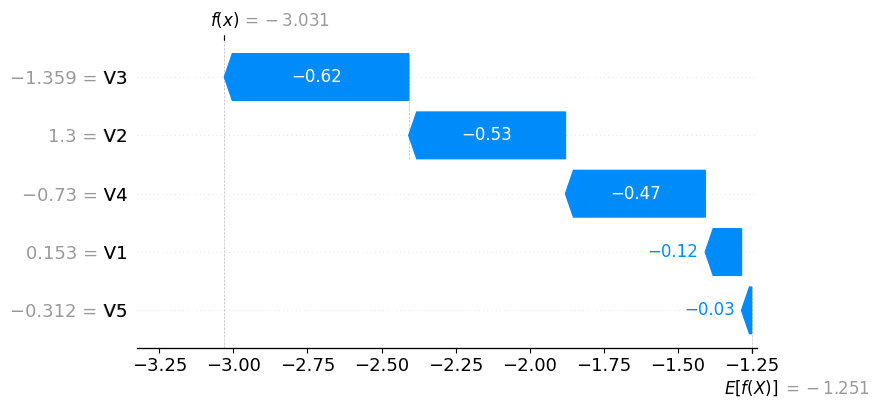

,V1,V2,V3,V4,V5,TARGET
3102,-0.261839,-0.824677,1.649498,0.906567,0.830566,2


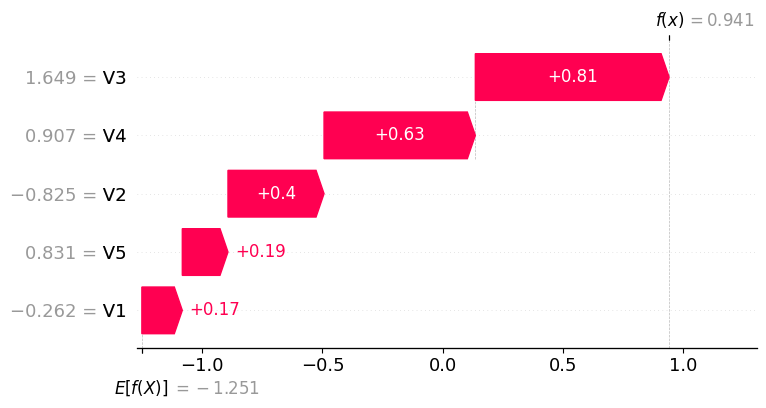

,V1,V2,V3,V4,V5,TARGET
1299,-0.236732,-0.594257,1.544963,-1.186315,-0.536999,2


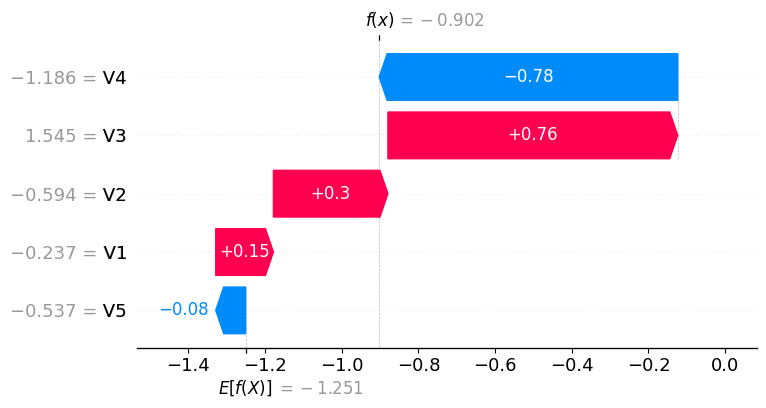

,V1,V2,V3,V4,V5,TARGET
2914,-0.777622,-0.295839,0.262987,-0.118778,-0.136583,1


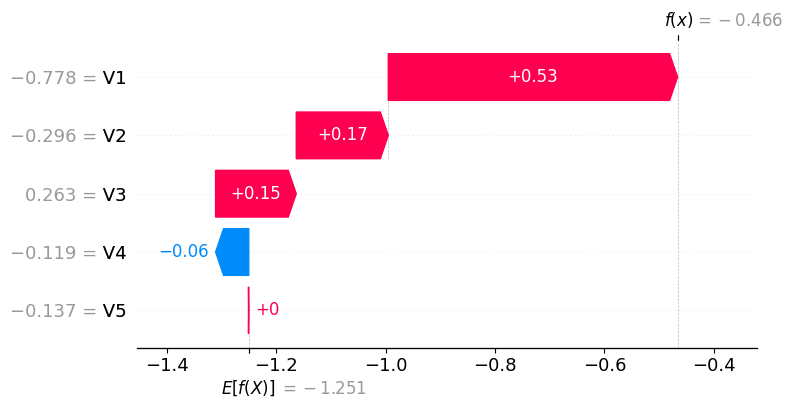

,V1,V2,V3,V4,V5,TARGET
416,-0.847626,-1.05581,-0.289216,-1.872634,-0.136583,1


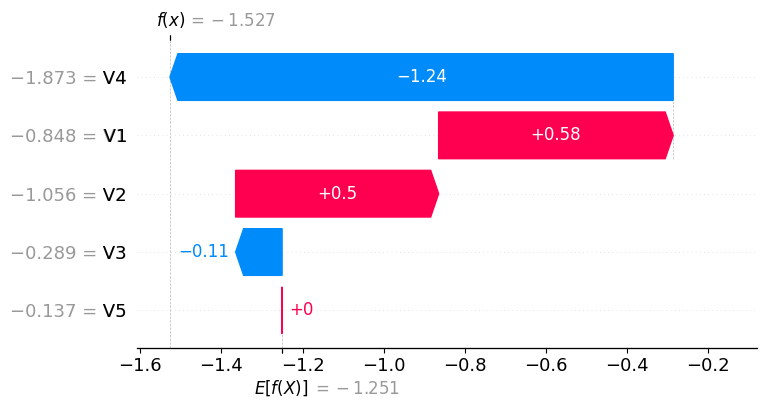

,V1,V2,V3,V4,V5,TARGET
3022,-0.598224,-0.375108,0.942325,-1.732816,2.614465,2


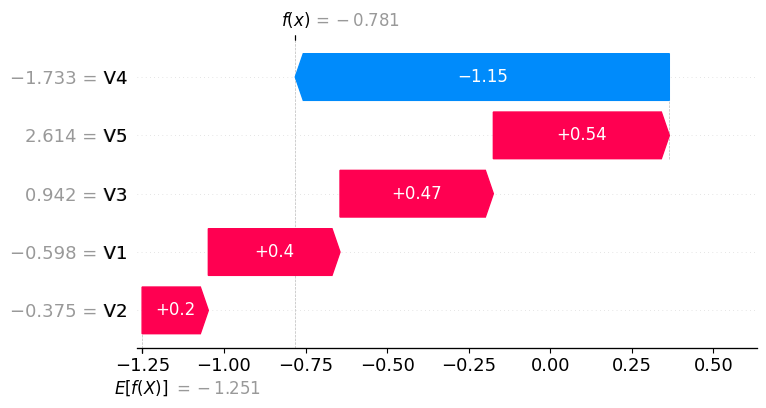

,V1,V2,V3,V4,V5,TARGET
2829,-0.687936,-0.938647,0.932945,1.108643,1.099898,1


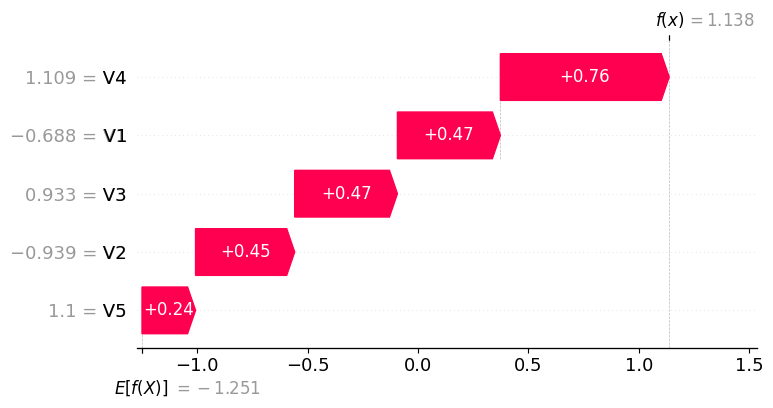

In [49]:
show_shap_values(shap_lr_values)

### Random forest

,V1,V2,V3,V4,V5,TARGET
3174,1.344327,0.263042,-1.17117,-0.221492,-0.31207,1


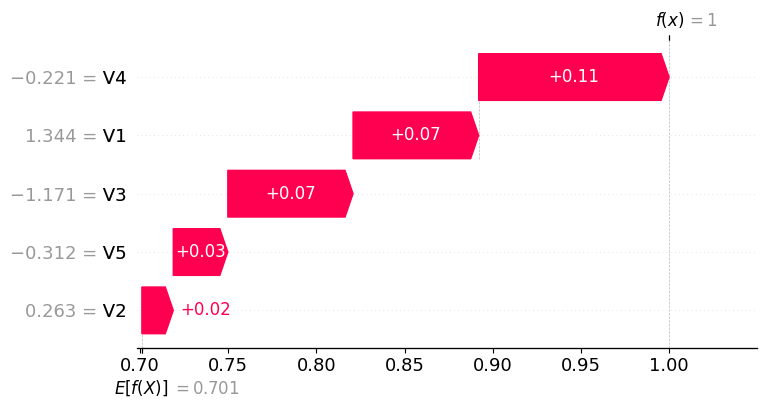

,V1,V2,V3,V4,V5,TARGET
3507,2.200125,-0.391748,-1.067369,-0.594245,-0.22383,1


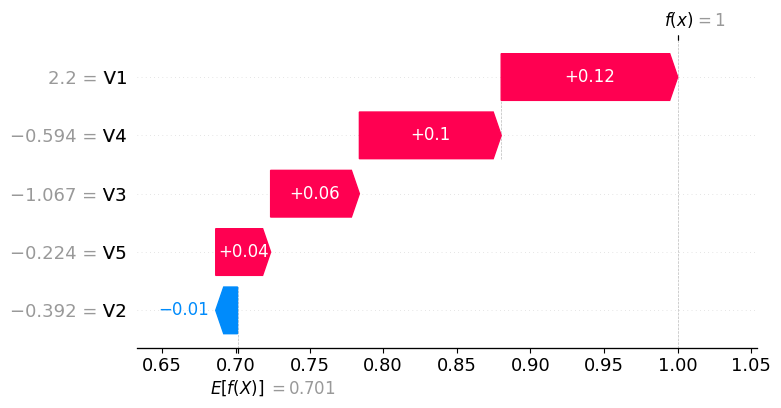

,V1,V2,V3,V4,V5,TARGET
860,-0.753484,-0.701102,0.926483,0.871314,-0.136583,1


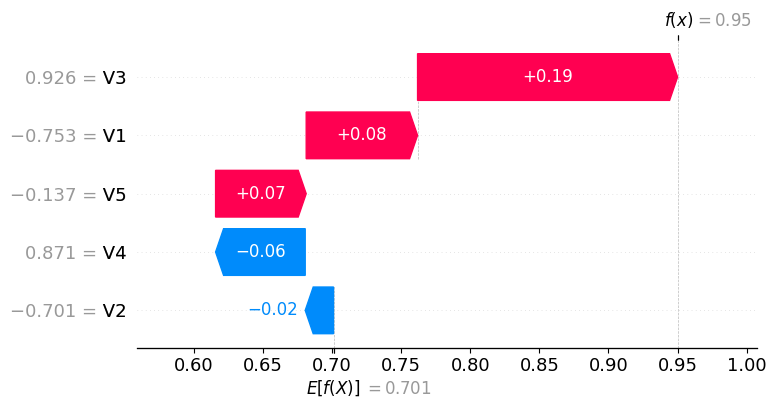

,V1,V2,V3,V4,V5,TARGET
1294,-0.596311,-0.477304,1.68211,0.4936,-1.23586,2


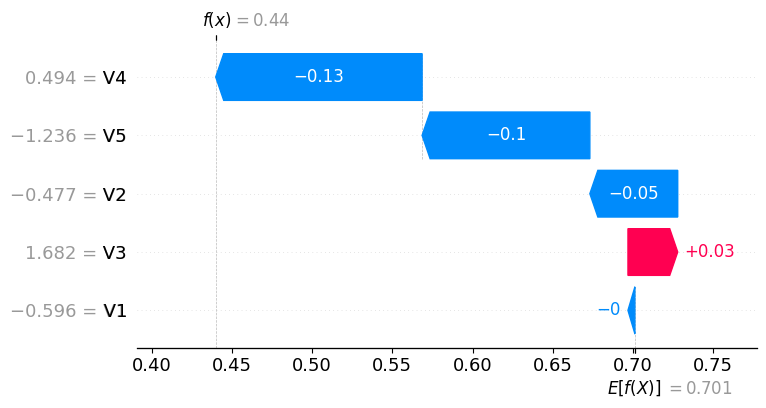

,V1,V2,V3,V4,V5,TARGET
1130,0.221449,1.430543,-1.264106,0.034341,1.635539,1


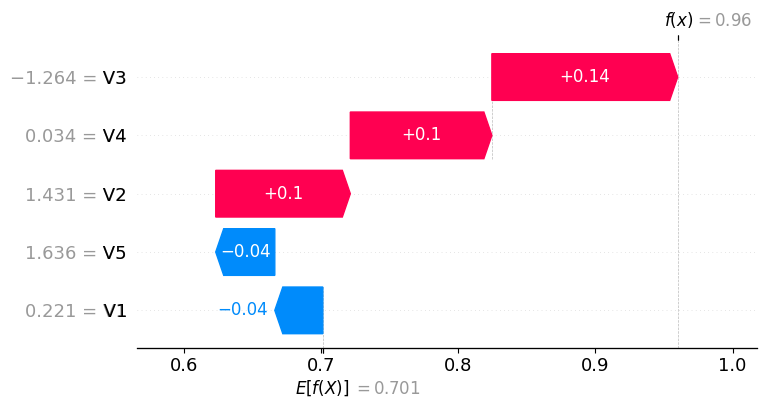

,V1,V2,V3,V4,V5,TARGET
1552,-0.553795,0.45928,1.619252,-1.268399,-0.136583,1


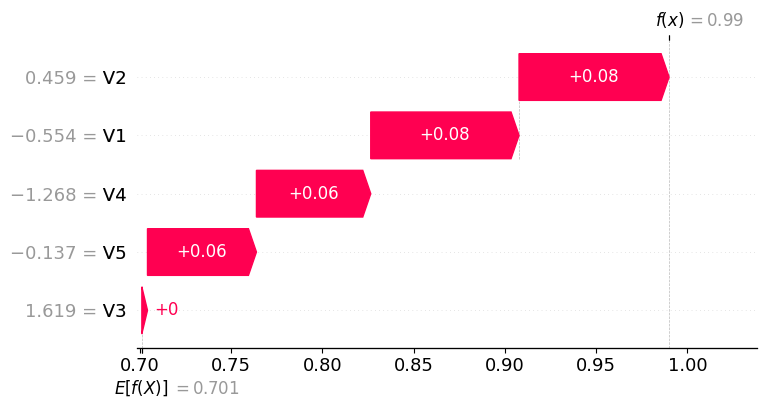

,V1,V2,V3,V4,V5,TARGET
2392,-0.784762,-1.089178,-0.321573,-1.497742,-0.136583,1


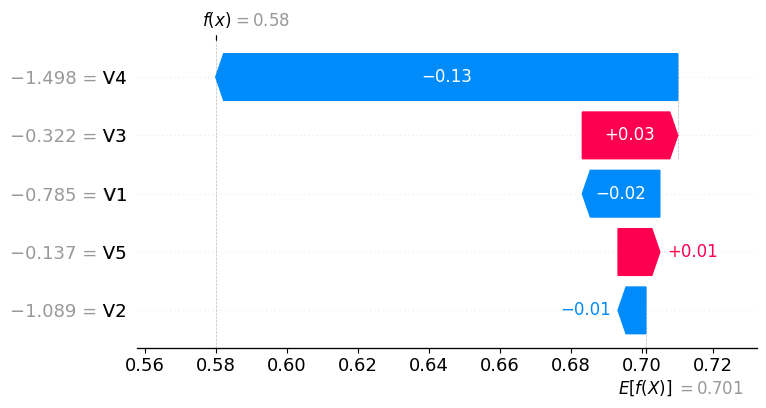

,V1,V2,V3,V4,V5,TARGET
157,0.574505,-0.031709,-0.358881,-0.029576,-0.815318,1


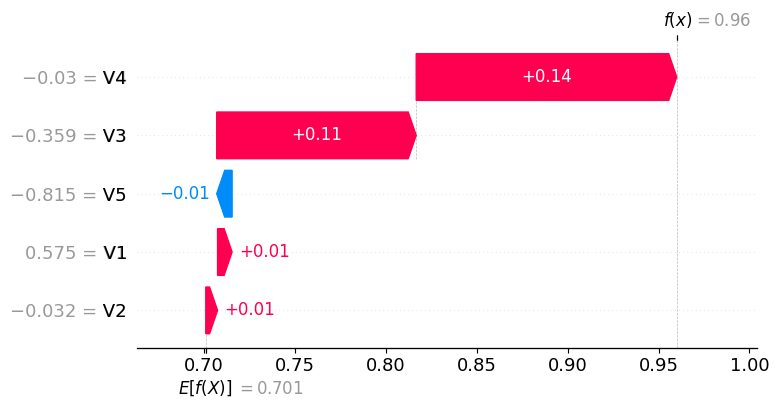

,V1,V2,V3,V4,V5,TARGET
2813,0.153374,1.300046,-1.35949,-0.730233,-0.312189,2


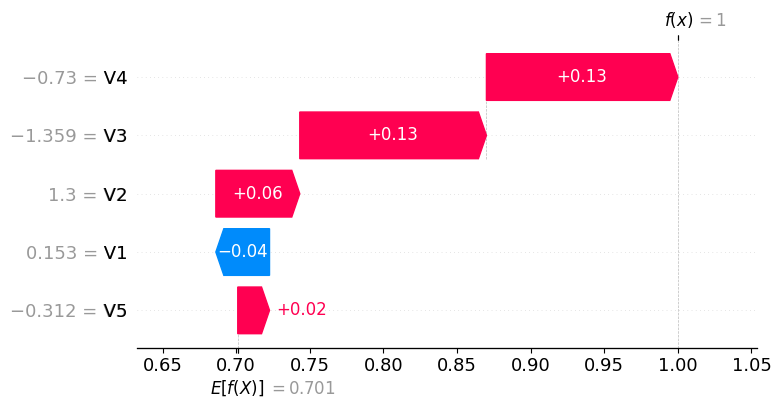

,V1,V2,V3,V4,V5,TARGET
3102,-0.261839,-0.824677,1.649498,0.906567,0.830566,2


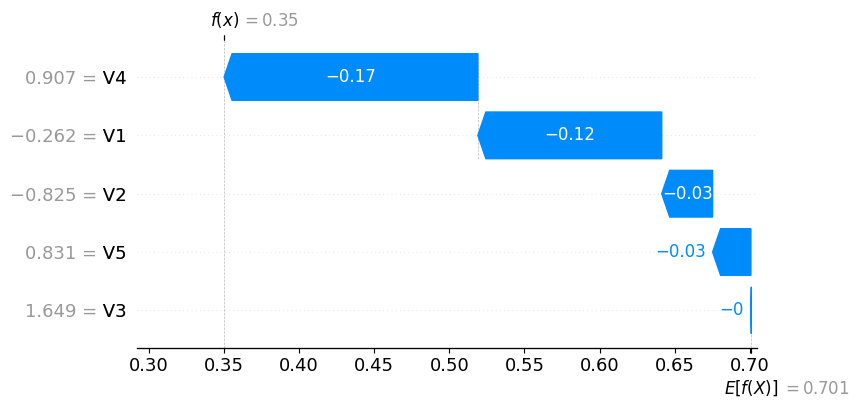

,V1,V2,V3,V4,V5,TARGET
1299,-0.236732,-0.594257,1.544963,-1.186315,-0.536999,2


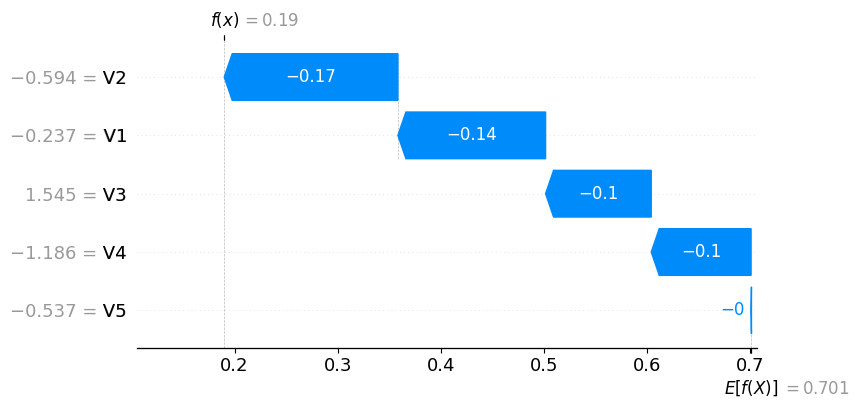

,V1,V2,V3,V4,V5,TARGET
2914,-0.777622,-0.295839,0.262987,-0.118778,-0.136583,1


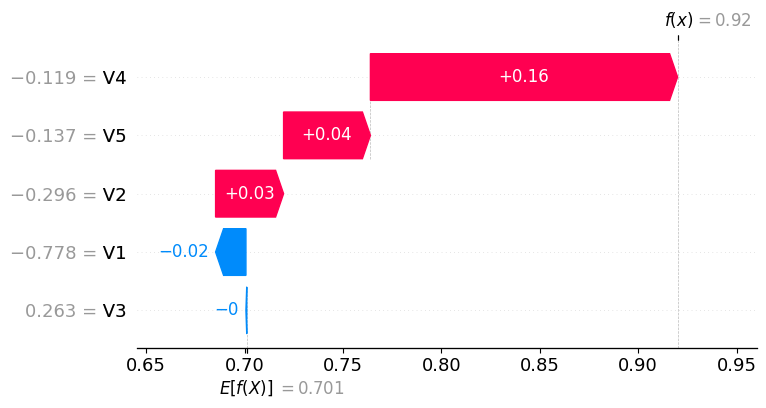

,V1,V2,V3,V4,V5,TARGET
416,-0.847626,-1.05581,-0.289216,-1.872634,-0.136583,1


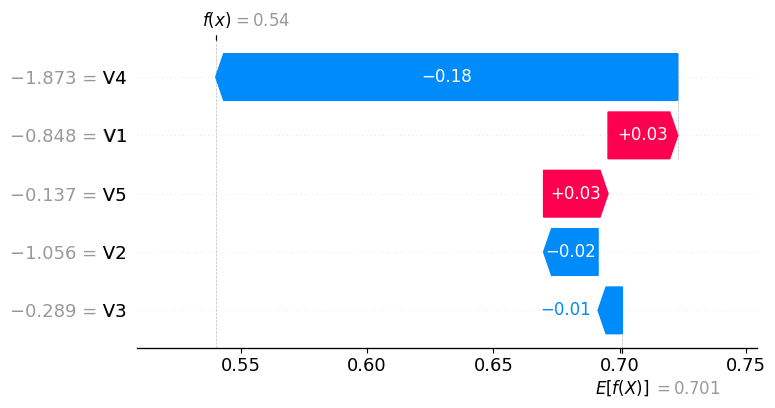

,V1,V2,V3,V4,V5,TARGET
3022,-0.598224,-0.375108,0.942325,-1.732816,2.614465,2


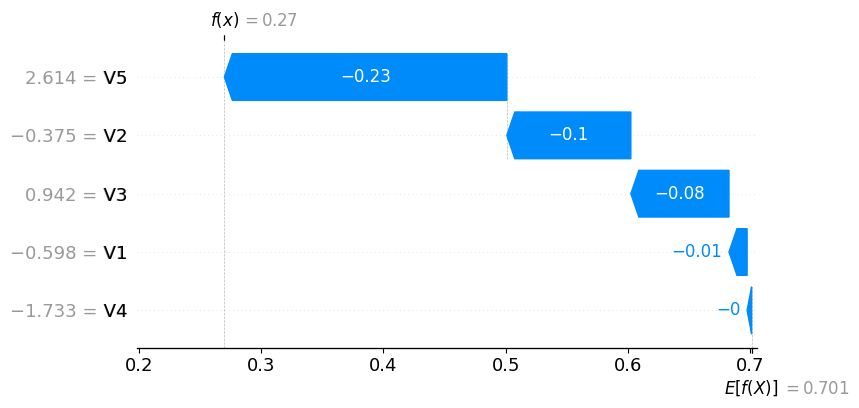

,V1,V2,V3,V4,V5,TARGET
2829,-0.687936,-0.938647,0.932945,1.108643,1.099898,1


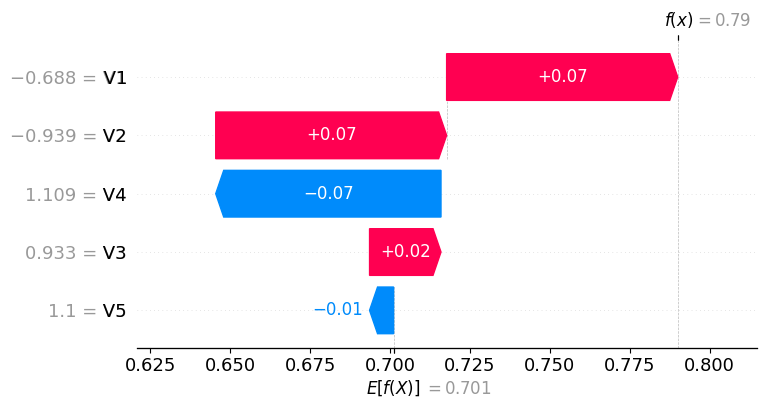

In [51]:
show_shap_values(shap_rf_values[:, :, 0])

### XGBClassifier

,V1,V2,V3,V4,V5,TARGET
3174,1.344327,0.263042,-1.17117,-0.221492,-0.31207,1


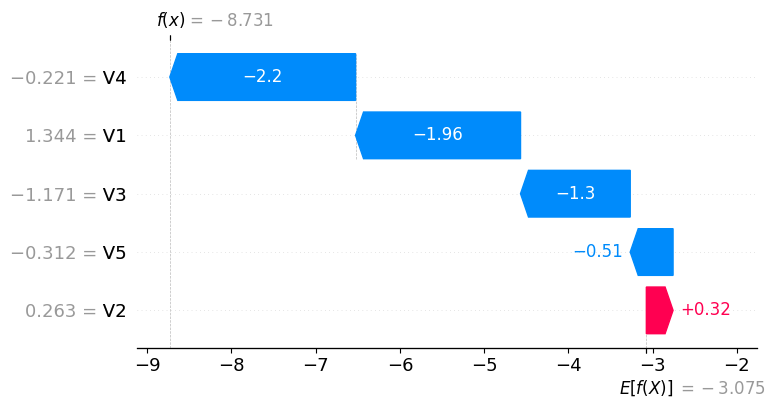

,V1,V2,V3,V4,V5,TARGET
3507,2.200125,-0.391748,-1.067369,-0.594245,-0.22383,1


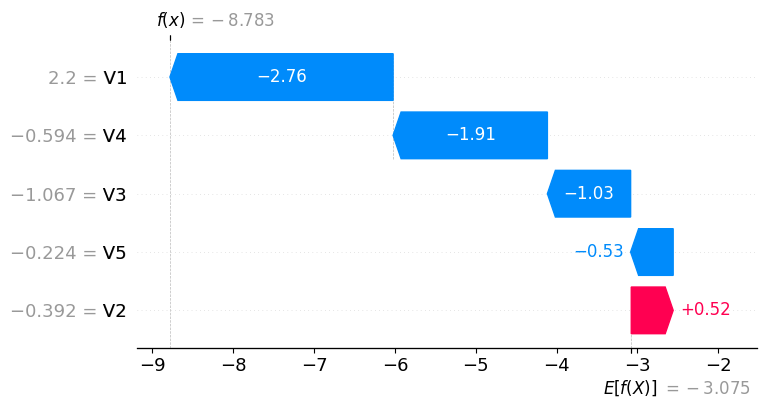

,V1,V2,V3,V4,V5,TARGET
860,-0.753484,-0.701102,0.926483,0.871314,-0.136583,1


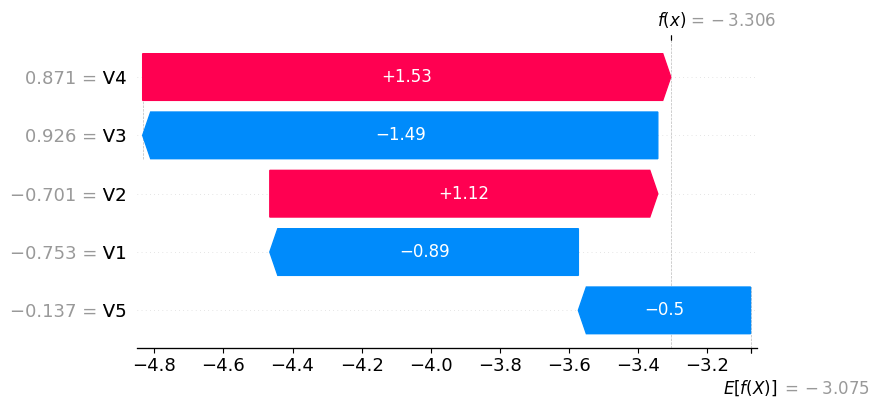

,V1,V2,V3,V4,V5,TARGET
1294,-0.596311,-0.477304,1.68211,0.4936,-1.23586,2


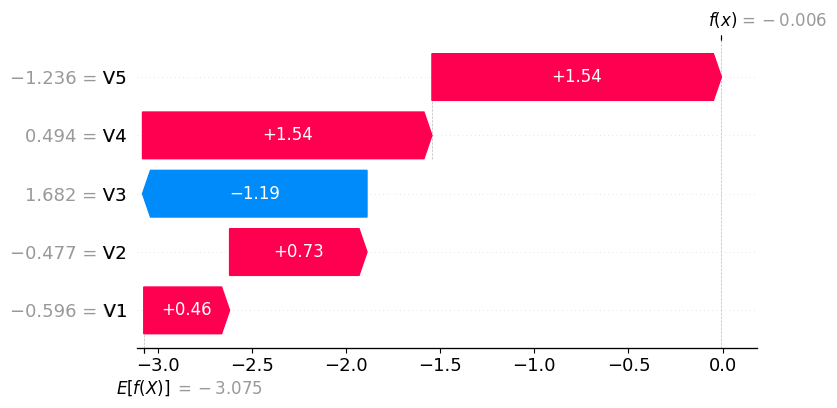

,V1,V2,V3,V4,V5,TARGET
1130,0.221449,1.430543,-1.264106,0.034341,1.635539,1


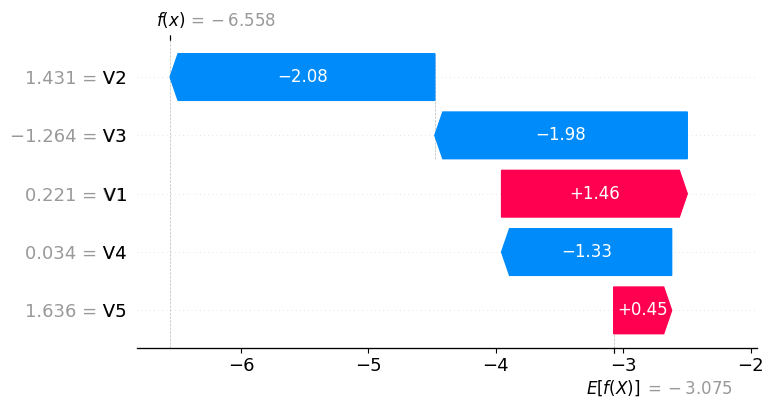

,V1,V2,V3,V4,V5,TARGET
1552,-0.553795,0.45928,1.619252,-1.268399,-0.136583,1


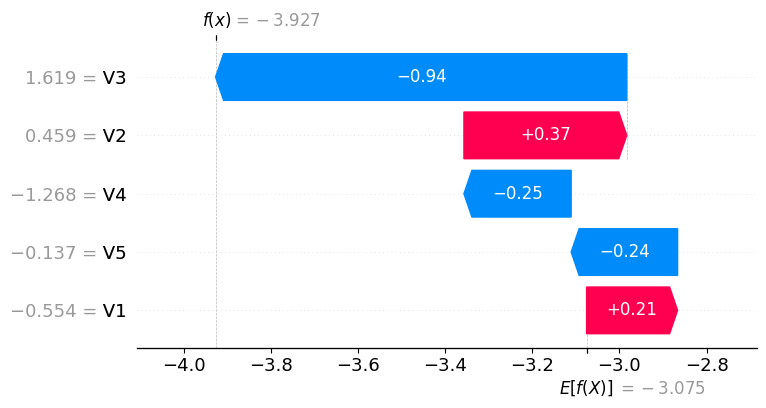

,V1,V2,V3,V4,V5,TARGET
2392,-0.784762,-1.089178,-0.321573,-1.497742,-0.136583,1


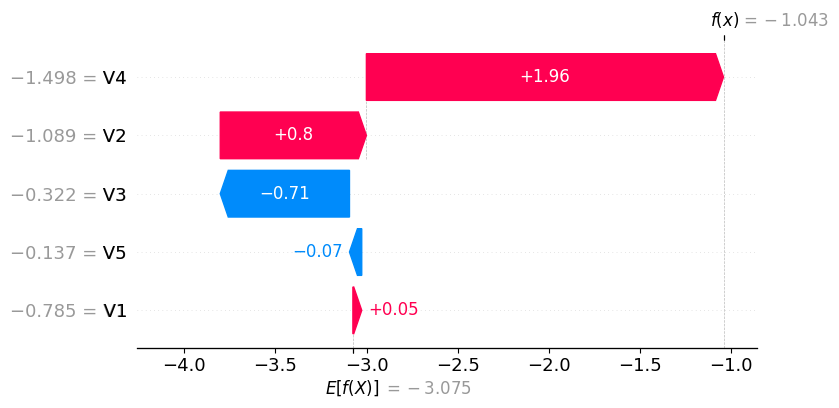

,V1,V2,V3,V4,V5,TARGET
157,0.574505,-0.031709,-0.358881,-0.029576,-0.815318,1


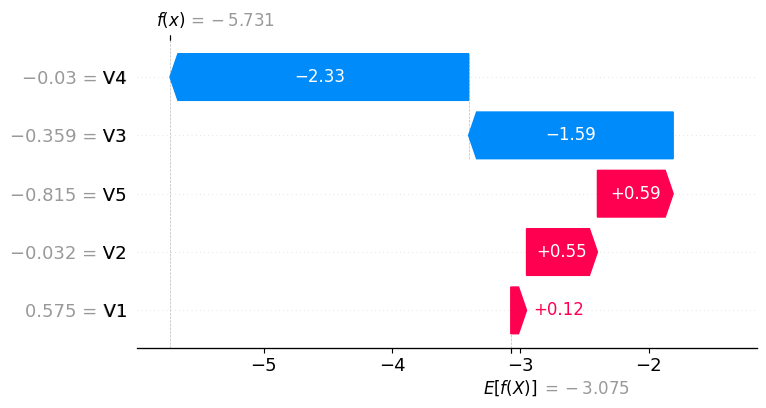

,V1,V2,V3,V4,V5,TARGET
2813,0.153374,1.300046,-1.35949,-0.730233,-0.312189,2


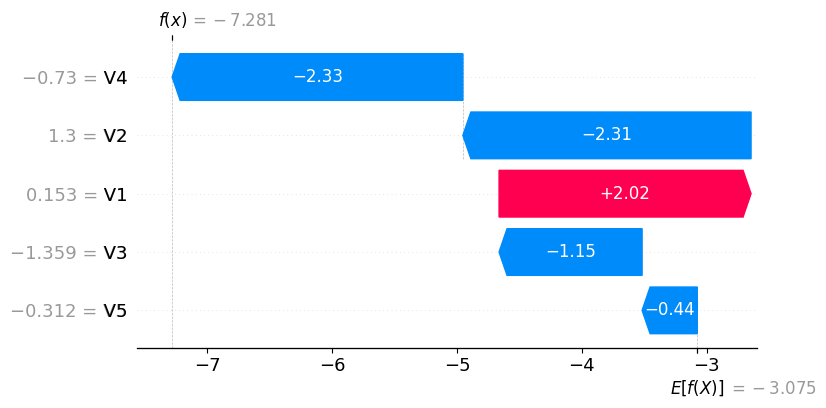

,V1,V2,V3,V4,V5,TARGET
3102,-0.261839,-0.824677,1.649498,0.906567,0.830566,2


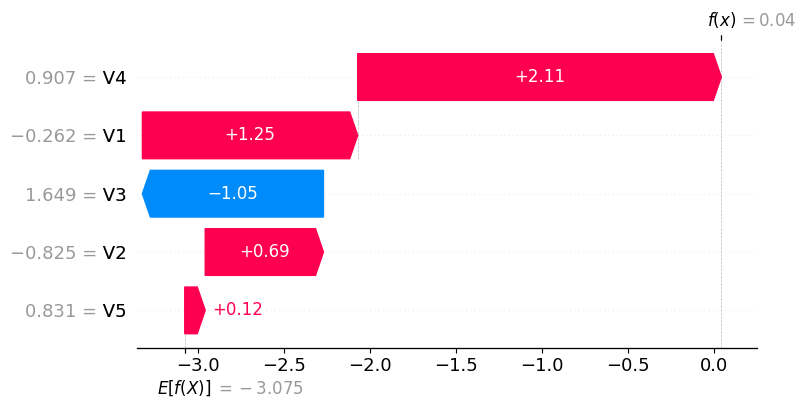

,V1,V2,V3,V4,V5,TARGET
1299,-0.236732,-0.594257,1.544963,-1.186315,-0.536999,2


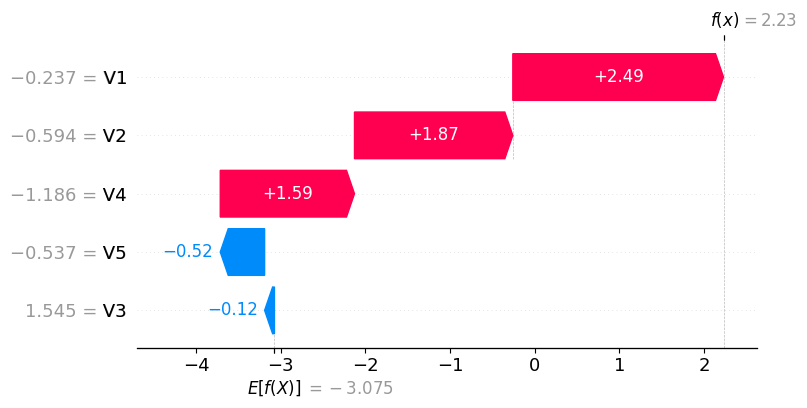

,V1,V2,V3,V4,V5,TARGET
2914,-0.777622,-0.295839,0.262987,-0.118778,-0.136583,1


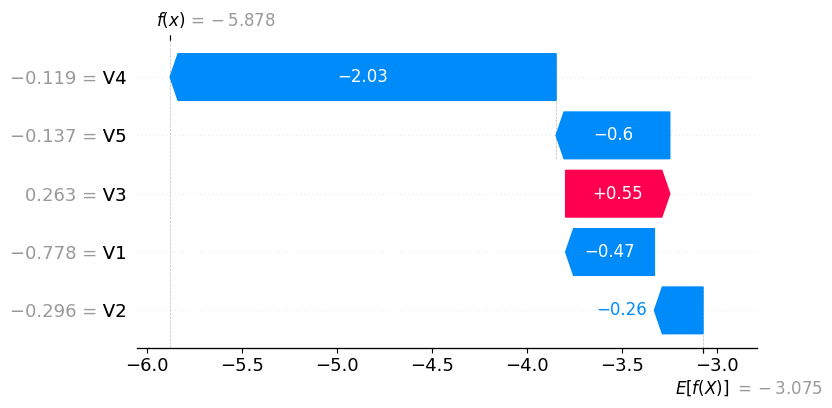

,V1,V2,V3,V4,V5,TARGET
416,-0.847626,-1.05581,-0.289216,-1.872634,-0.136583,1


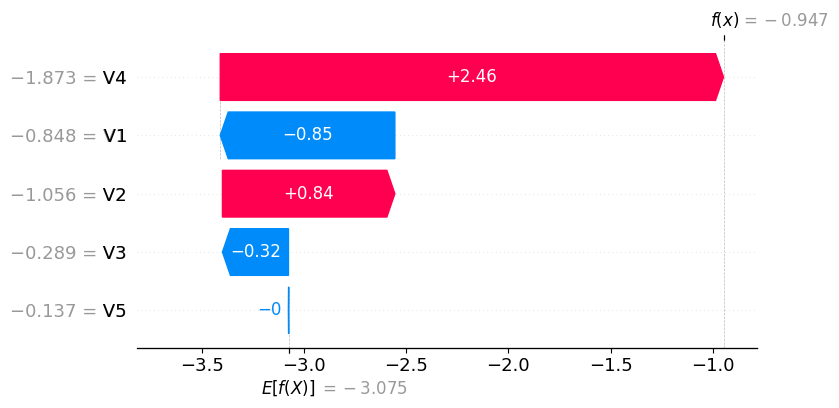

,V1,V2,V3,V4,V5,TARGET
3022,-0.598224,-0.375108,0.942325,-1.732816,2.614465,2


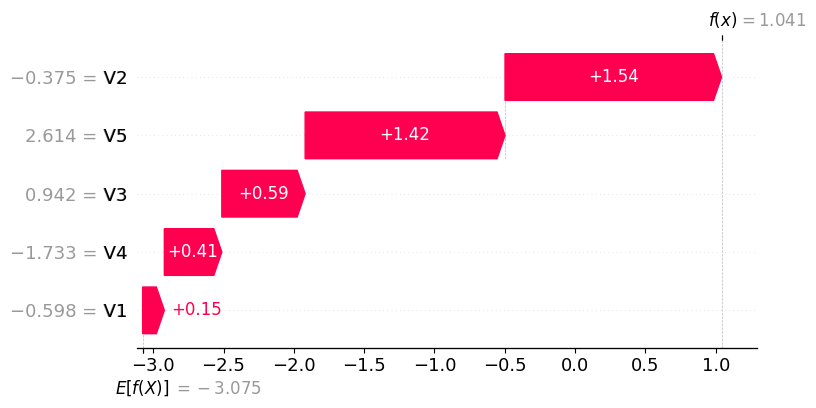

,V1,V2,V3,V4,V5,TARGET
2829,-0.687936,-0.938647,0.932945,1.108643,1.099898,1


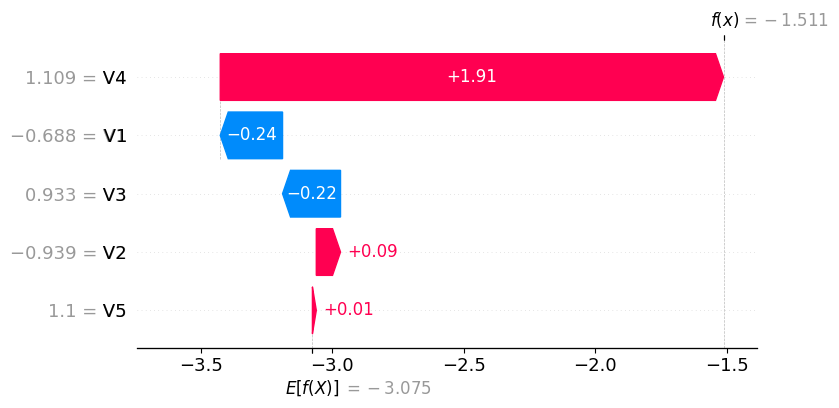

In [52]:
show_shap_values(shap_xgb_values)